In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

from train import * 

import warnings
warnings.filterwarnings('ignore')

In [16]:
import os 

### Loading data

In [17]:
current_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))

data_folder_path = os.path.join(root_dir, 'data')

file_path = os.path.join(data_folder_path, 'robotarm_update.csv')

df = pd.read_csv(file_path)

In [18]:
file_path

'/Users/ajkunaseipi/Documents/MA4/PISA/data/robotarm_update.csv'

## 1. Baseline experiment: only predicting worldspace with worldspace

### Penalty: 0.1

### Logistic regression

In [21]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 200,
    'lr': 0.01,
    'dropout': 0,
    'weight_decay': 0,
    'split_type': "distribution",
    'task': 'baseline',
    'one_hot': True
}

experiment_name = "experiment1"
output_file = "results.json"
data_path = '/Users/ajkunaseipi/Documents/MA4/PISA/data/robotarm_2.csv'

#run_experiment(experiment_name, data_path, args, output_file)

In [22]:
cross_validate(**args, k=5)

world_sequences:  [list([1, 1, 1, 1]) list([1, 1, 0, 1]) list([1, 0])
 list([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1]) list([1, 0])
 list([1, 0, 1, 1, 1]) list([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])
 list([1, 1]) list([0, 0, 1]) list([1, 0, 1, 1, 1, 1, 0])
 list([1, 1, 0, 0, 1, 0, 0]) list([1, 1, 1])
 list([1, 0, 1, 1, 1, 0, 0, 1]) list([1, 1, 1, 0, 1])
 list([1, 1, 0, 1, 1, 1]) list([1, 1, 0, 1]) list([1, 1, 1]) list([0, 1])
 list([0, 0, 0, 1]) list([1, 1]) list([1, 1, 0, 1]) list([1, 1, 1, 0])
 list([1, 1, 0, 0, 0, 1, 0]) list([1, 1, 0, 1, 0]) list([1, 1, 1, 1])
 list([1, 0, 1, 1]) list([1, 1]) list([1, 1, 1])
 list([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]) list([1, 0, 1, 1])
 list([1, 0, 1, 1, 0]) list([1, 1]) list([1, 1, 0, 1]) list([1, 1, 1])
 list([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1]) list([1, 1, 0, 0, 1, 1, 0, 1, 1])
 list([1, 1, 0, 0, 0, 0, 0, 0, 0, 1])
 list([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
 list([1, 1]) list([1, 1, 1, 0, 0, 0, 1])
 list([1, 1

[{'Mean AUC': '0.59',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.59',
  'Standard Deviation of Accuracy': '0.03'}]

In [5]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'dropout': 0,
    'weight_decay': 0.01,
    'split_type': "distribution",
    'task': 'baseline'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

NameError: name 'df' is not defined

In [6]:
cross_validate(**args, k=5, data=df)

TypeError: cross_validate() missing 1 required positional argument: 'data'

Train: 609, Test: 153, Valid: 76
Epoch [10/300], Loss: 0.6858, Loss Valid: 0.6920, Accuracy Valid: 0.5179
Epoch [20/300], Loss: 0.6811, Loss Valid: 0.6890, Accuracy Valid: 0.5147
Epoch [30/300], Loss: 0.6781, Loss Valid: 0.6876, Accuracy Valid: 0.5147
Epoch [40/300], Loss: 0.6762, Loss Valid: 0.6870, Accuracy Valid: 0.5179
Epoch [50/300], Loss: 0.6749, Loss Valid: 0.6870, Accuracy Valid: 0.5309
Epoch [60/300], Loss: 0.6740, Loss Valid: 0.6871, Accuracy Valid: 0.5309
Epoch [70/300], Loss: 0.6735, Loss Valid: 0.6874, Accuracy Valid: 0.5342
Epoch [80/300], Loss: 0.6732, Loss Valid: 0.6876, Accuracy Valid: 0.5342
Epoch [90/300], Loss: 0.6730, Loss Valid: 0.6877, Accuracy Valid: 0.5342
Epoch [100/300], Loss: 0.6729, Loss Valid: 0.6877, Accuracy Valid: 0.5342
Epoch [110/300], Loss: 0.6729, Loss Valid: 0.6877, Accuracy Valid: 0.5342
Epoch [120/300], Loss: 0.6729, Loss Valid: 0.6877, Accuracy Valid: 0.5342
Epoch [130/300], Loss: 0.6729, Loss Valid: 0.6877, Accuracy Valid: 0.5342
Epoch [140/300

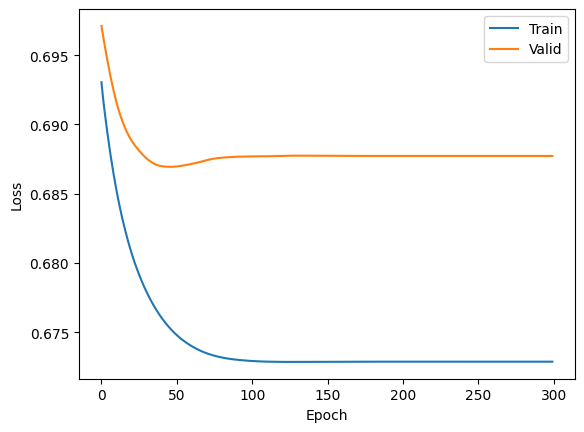

In [17]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout': 0,
    'split_type': "median",
    'task': 'baseline'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

Epoch [10/300], Loss: 0.6881, Validation Loss: 0.6911, Validation Accuracy: 0.5411
Epoch [20/300], Loss: 0.6812, Validation Loss: 0.6952, Validation Accuracy: 0.5127
Epoch [30/300], Loss: 0.6761, Validation Loss: 0.6910, Validation Accuracy: 0.5269
Epoch [40/300], Loss: 0.6746, Validation Loss: 0.6871, Validation Accuracy: 0.5354
Epoch [50/300], Loss: 0.6738, Validation Loss: 0.6873, Validation Accuracy: 0.5326
Epoch [60/300], Loss: 0.6735, Validation Loss: 0.6881, Validation Accuracy: 0.5326
Epoch [70/300], Loss: 0.6735, Validation Loss: 0.6884, Validation Accuracy: 0.5326
Epoch [80/300], Loss: 0.6735, Validation Loss: 0.6884, Validation Accuracy: 0.5297
Epoch [90/300], Loss: 0.6735, Validation Loss: 0.6884, Validation Accuracy: 0.5297
Epoch [100/300], Loss: 0.6735, Validation Loss: 0.6884, Validation Accuracy: 0.5326
Epoch [110/300], Loss: 0.6735, Validation Loss: 0.6884, Validation Accuracy: 0.5326
Epoch [120/300], Loss: 0.6735, Validation Loss: 0.6884, Validation Accuracy: 0.5326
E

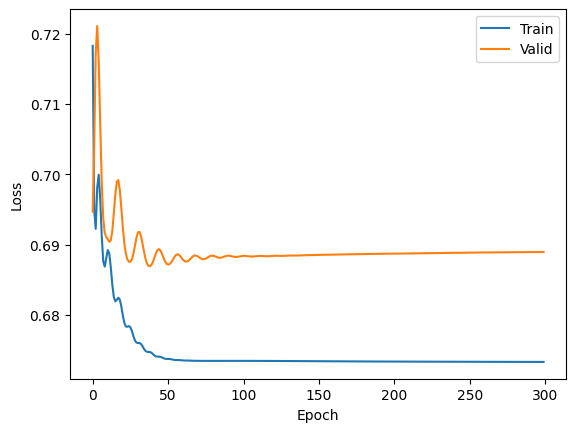

In [41]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout': 0,
    'split_type': "median",
    'task': 'baseline', 
    'one_hot': True
}

train_losses, valid_losses, roc_auc, accuracy, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [42]:
cross_validate(**args, k=5)

Fold 1/5
Test Accuracy: 54.03%
ROC AUC: 0.5525
Fold 2/5
Test Accuracy: 55.53%
ROC AUC: 0.5580
Fold 3/5
Test Accuracy: 56.45%
ROC AUC: 0.5714
Fold 4/5
Test Accuracy: 60.37%
ROC AUC: 0.6296
Fold 5/5
Test Accuracy: 58.22%
ROC AUC: 0.6148
Mean AUC: 0.59
Standard Deviation of AUC: 0.03
Mean Accuracy: 0.57
Standard Deviation of Accuracy: 0.02


In [18]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.58
Standard Deviation of AUC: 0.03
Mean Accuracy: 0.57
Standard Deviation of Accuracy: 0.02


### Only L1

Train: 244, Test: 62, Valid: 31
Epoch [10/300], Loss: 0.6839, Loss Valid: 0.6928, Accuracy Valid: 0.5697
Epoch [20/300], Loss: 0.6792, Loss Valid: 0.6864, Accuracy Valid: 0.6242
Epoch [30/300], Loss: 0.6767, Loss Valid: 0.6802, Accuracy Valid: 0.6242
Epoch [40/300], Loss: 0.6754, Loss Valid: 0.6749, Accuracy Valid: 0.6242
Epoch [50/300], Loss: 0.6747, Loss Valid: 0.6712, Accuracy Valid: 0.6242
Epoch [60/300], Loss: 0.6743, Loss Valid: 0.6686, Accuracy Valid: 0.6242
Epoch [70/300], Loss: 0.6742, Loss Valid: 0.6667, Accuracy Valid: 0.6242
Epoch [80/300], Loss: 0.6741, Loss Valid: 0.6652, Accuracy Valid: 0.6242
Epoch [90/300], Loss: 0.6740, Loss Valid: 0.6642, Accuracy Valid: 0.6242
Epoch [100/300], Loss: 0.6740, Loss Valid: 0.6634, Accuracy Valid: 0.6242
Epoch [110/300], Loss: 0.6739, Loss Valid: 0.6628, Accuracy Valid: 0.6242
Epoch [120/300], Loss: 0.6739, Loss Valid: 0.6623, Accuracy Valid: 0.6242
Epoch [130/300], Loss: 0.6739, Loss Valid: 0.6620, Accuracy Valid: 0.6242
Epoch [140/300]

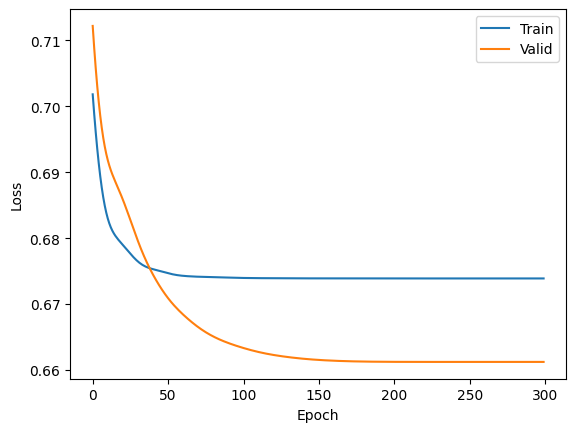

In [19]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'dropout': 0,
    'weight_decay': 0.01,
    'activities': [1,0,0],
    'split_type': "distribution",
    'task': 'baseline'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [20]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.55
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.57
Standard Deviation of Accuracy: 0.03


## Random Forest

In [18]:
# Set up the arguments for the training
args = {
    'model_type': 'rf',
    'data': df,
    'epochs': 200,
    'lr': 0.01,
    'dropout': 0,
    'weight_decay': 0,
    'split_type': "distribution",
    'task': 'baseline',
    'one_hot': True
}

results = cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


In [19]:
results

[{'Fold': 1, 'Test Accuracy': '58.51%', 'ROC AUC': '0.5510'},
 {'Fold': 2, 'Test Accuracy': '59.25%', 'ROC AUC': '0.5382'},
 {'Fold': 3, 'Test Accuracy': '58.94%', 'ROC AUC': '0.5272'},
 {'Fold': 4, 'Test Accuracy': '60.37%', 'ROC AUC': '0.5361'},
 {'Fold': 5, 'Test Accuracy': '60.11%', 'ROC AUC': '0.5739'},
 {'Mean AUC': '0.55',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.59',
  'Standard Deviation of Accuracy': '0.01'}]

### Only L2

Train: 206, Test: 52, Valid: 26
Epoch [10/300], Loss: 0.6787, Loss Valid: 0.6707, Accuracy Valid: 0.6280
Epoch [20/300], Loss: 0.6661, Loss Valid: 0.6575, Accuracy Valid: 0.6812
Epoch [30/300], Loss: 0.6606, Loss Valid: 0.6526, Accuracy Valid: 0.6812
Epoch [40/300], Loss: 0.6572, Loss Valid: 0.6504, Accuracy Valid: 0.6812
Epoch [50/300], Loss: 0.6545, Loss Valid: 0.6486, Accuracy Valid: 0.6812
Epoch [60/300], Loss: 0.6526, Loss Valid: 0.6458, Accuracy Valid: 0.6812
Epoch [70/300], Loss: 0.6515, Loss Valid: 0.6433, Accuracy Valid: 0.6812
Epoch [80/300], Loss: 0.6508, Loss Valid: 0.6418, Accuracy Valid: 0.6812
Epoch [90/300], Loss: 0.6504, Loss Valid: 0.6409, Accuracy Valid: 0.6812
Epoch [100/300], Loss: 0.6501, Loss Valid: 0.6403, Accuracy Valid: 0.6812
Epoch [110/300], Loss: 0.6500, Loss Valid: 0.6400, Accuracy Valid: 0.6812
Epoch [120/300], Loss: 0.6499, Loss Valid: 0.6398, Accuracy Valid: 0.6812
Epoch [130/300], Loss: 0.6499, Loss Valid: 0.6398, Accuracy Valid: 0.6812
Epoch [140/300]

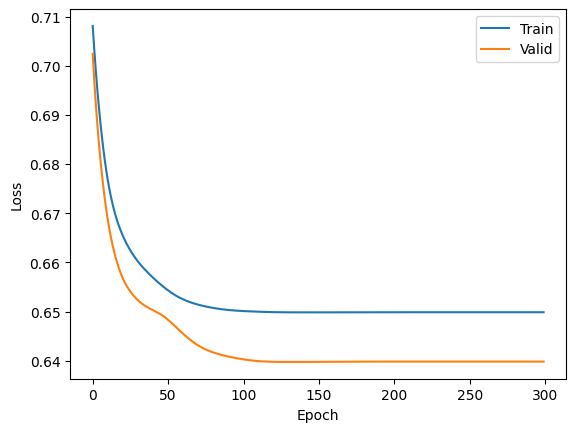

In [21]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'dropout': 0,
    'weight_decay': 0.1,
    'activities': [0,1,0],
    'split_type': "distribution",
    'task': 'baseline'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [22]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.53
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.66
Standard Deviation of Accuracy: 0.02


### Only L3

Train: 158, Test: 40, Valid: 20
Epoch [10/300], Loss: 0.6776, Loss Valid: 0.6549, Accuracy Valid: 0.7015
Epoch [20/300], Loss: 0.6687, Loss Valid: 0.6351, Accuracy Valid: 0.7015
Epoch [30/300], Loss: 0.6646, Loss Valid: 0.6320, Accuracy Valid: 0.7015
Epoch [40/300], Loss: 0.6613, Loss Valid: 0.6360, Accuracy Valid: 0.7015
Epoch [50/300], Loss: 0.6595, Loss Valid: 0.6384, Accuracy Valid: 0.7015
Epoch [60/300], Loss: 0.6581, Loss Valid: 0.6363, Accuracy Valid: 0.7015
Epoch [70/300], Loss: 0.6571, Loss Valid: 0.6339, Accuracy Valid: 0.7015
Epoch [80/300], Loss: 0.6564, Loss Valid: 0.6335, Accuracy Valid: 0.7015
Epoch [90/300], Loss: 0.6559, Loss Valid: 0.6339, Accuracy Valid: 0.7015
Epoch [100/300], Loss: 0.6556, Loss Valid: 0.6338, Accuracy Valid: 0.7015
Epoch [110/300], Loss: 0.6553, Loss Valid: 0.6335, Accuracy Valid: 0.7015
Epoch [120/300], Loss: 0.6552, Loss Valid: 0.6335, Accuracy Valid: 0.7015
Epoch [130/300], Loss: 0.6550, Loss Valid: 0.6337, Accuracy Valid: 0.7015
Epoch [140/300]

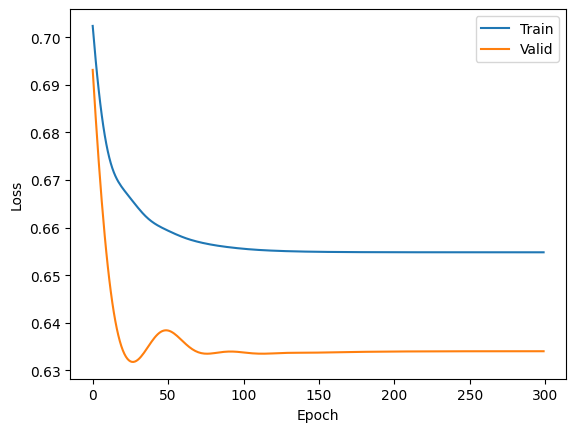

In [23]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'dropout': 0,
    'weight_decay': 0.01,
    'activities': [0,0,1],
    'split_type': "distribution",
    'task': 'baseline'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [24]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.55
Standard Deviation of AUC: 0.01
Mean Accuracy: 0.61
Standard Deviation of Accuracy: 0.05


### LSTM

In [ ]:
# Set up the arguments for the training
args = {
    'model_type': 'rf',
    'data': df,
    'epochs': 200,
    'lr': 0.01,
    'dropout': 0,
    'weight_decay': 0,
    'split_type': "distribution",
    'task': 'baseline',
    'one_hot': True
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

Train: 609, Test: 153, Valid: 76
Epoch [10/150], Loss: 0.6689, Loss Valid: 0.6691, Accuracy Valid: 0.6091
Epoch [20/150], Loss: 0.6637, Loss Valid: 0.6679, Accuracy Valid: 0.6091
Epoch [30/150], Loss: 0.6612, Loss Valid: 0.6680, Accuracy Valid: 0.6091
Epoch [40/150], Loss: 0.6587, Loss Valid: 0.6644, Accuracy Valid: 0.6091
Epoch [50/150], Loss: 0.6571, Loss Valid: 0.6621, Accuracy Valid: 0.6091
Epoch [60/150], Loss: 0.6571, Loss Valid: 0.6623, Accuracy Valid: 0.6091
Epoch [70/150], Loss: 0.6555, Loss Valid: 0.6600, Accuracy Valid: 0.6091
Epoch [80/150], Loss: 0.6582, Loss Valid: 0.6583, Accuracy Valid: 0.6091
Epoch [90/150], Loss: 0.6541, Loss Valid: 0.6601, Accuracy Valid: 0.6059
Epoch [100/150], Loss: 0.6565, Loss Valid: 0.6599, Accuracy Valid: 0.6091
Epoch [110/150], Loss: 0.6542, Loss Valid: 0.6633, Accuracy Valid: 0.6059
Epoch [120/150], Loss: 0.6519, Loss Valid: 0.6588, Accuracy Valid: 0.5928
Epoch [130/150], Loss: 0.6613, Loss Valid: 0.6617, Accuracy Valid: 0.5993
Epoch [140/150

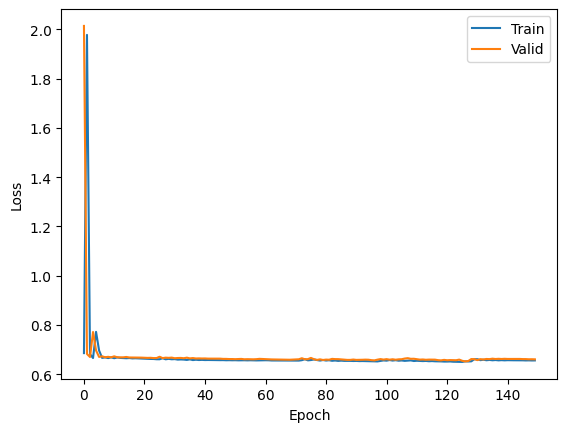

In [27]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.05,
    'weight_decay': 0,
    'dropout': 0.1,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'baseline'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [43]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.05,
    'weight_decay': 0,
    'dropout': 0.1,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'baseline', 
    'one_hot': True
}

train_losses, valid_losses, roc_auc, accuracy, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

Epoch [10/150], Loss: 1.4354, Validation Loss: 0.6621, Validation Accuracy: 0.6263
Epoch [20/150], Loss: 0.6650, Validation Loss: 0.6553, Validation Accuracy: 0.6263
Epoch [30/150], Loss: 1.1861, Validation Loss: 0.9016, Validation Accuracy: 0.6263
Epoch [40/150], Loss: 0.6635, Validation Loss: 0.6658, Validation Accuracy: 0.6031
Epoch [50/150], Loss: 0.6607, Validation Loss: 0.6665, Validation Accuracy: 0.6263
Epoch [60/150], Loss: 0.6607, Validation Loss: 0.6618, Validation Accuracy: 0.6263
Epoch [70/150], Loss: 0.6598, Validation Loss: 0.6601, Validation Accuracy: 0.6263
Epoch [80/150], Loss: 0.6591, Validation Loss: 0.6597, Validation Accuracy: 0.6263
Epoch [90/150], Loss: 0.6583, Validation Loss: 0.6589, Validation Accuracy: 0.6263
Epoch [100/150], Loss: 0.6581, Validation Loss: 0.6596, Validation Accuracy: 0.6263
Epoch [110/150], Loss: 0.6578, Validation Loss: 0.6594, Validation Accuracy: 0.6263
Epoch [120/150], Loss: 0.6576, Validation Loss: 0.6596, Validation Accuracy: 0.6263
E

ValueError: too many values to unpack (expected 5)

In [45]:
cross_validate(**args, k=5)

Fold 1/5
Test Accuracy: 58.66%
ROC AUC: 0.5730
Fold 2/5
Test Accuracy: 62.08%
ROC AUC: 0.5368
Fold 3/5
Test Accuracy: 61.44%
ROC AUC: 0.5410
Fold 4/5
Test Accuracy: 64.95%
ROC AUC: 0.5996
Fold 5/5
Test Accuracy: 61.86%
ROC AUC: 0.5979
Mean AUC: 0.57
Standard Deviation of AUC: 0.03
Mean Accuracy: 0.62
Standard Deviation of Accuracy: 0.02


Train: 609, Test: 153, Valid: 76
Epoch [10/150], Loss: 0.6927, Loss Valid: 0.6921, Accuracy Valid: 0.5277
Epoch [20/150], Loss: 0.6812, Loss Valid: 0.6878, Accuracy Valid: 0.5244
Epoch [30/150], Loss: 0.6758, Loss Valid: 0.6846, Accuracy Valid: 0.5179
Epoch [40/150], Loss: 0.6753, Loss Valid: 0.6864, Accuracy Valid: 0.5505
Epoch [50/150], Loss: 0.6758, Loss Valid: 0.6870, Accuracy Valid: 0.5179
Epoch [60/150], Loss: 0.6739, Loss Valid: 0.6872, Accuracy Valid: 0.5505
Epoch [70/150], Loss: 0.6785, Loss Valid: 0.6878, Accuracy Valid: 0.5505
Epoch [80/150], Loss: 0.6743, Loss Valid: 0.6903, Accuracy Valid: 0.5277
Epoch [90/150], Loss: 0.6738, Loss Valid: 0.6881, Accuracy Valid: 0.5244
Epoch [100/150], Loss: 0.6735, Loss Valid: 0.6881, Accuracy Valid: 0.5505
Epoch [110/150], Loss: 0.6732, Loss Valid: 0.6889, Accuracy Valid: 0.5212
Epoch [120/150], Loss: 0.6729, Loss Valid: 0.6892, Accuracy Valid: 0.5212
Epoch [130/150], Loss: 0.6720, Loss Valid: 0.6887, Accuracy Valid: 0.5505
Epoch [140/150

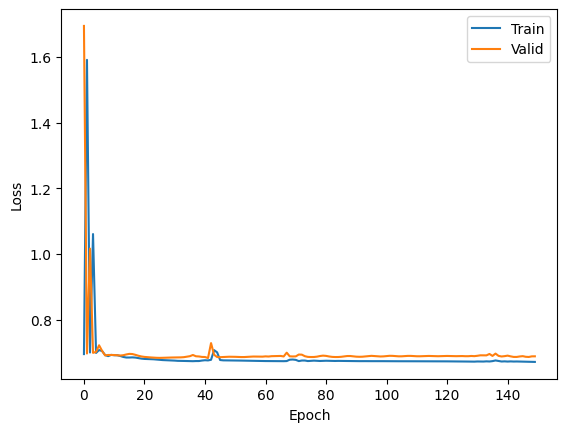

In [29]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.05,
    'weight_decay': 0,
    'dropout': 0.1,
    'hidden_dim': 100,
    'split_type': "median",
    'task': 'baseline'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

### Optimal penalty

### Logistic regression

Epoch [10/200], Loss: 0.6927, Loss Valid: 0.6936, Accuracy Valid: 0.4874
Epoch [20/200], Loss: 0.6807, Loss Valid: 0.6890, Accuracy Valid: 0.5294
Epoch [30/200], Loss: 0.6758, Loss Valid: 0.6854, Accuracy Valid: 0.5406
Epoch [40/200], Loss: 0.6726, Loss Valid: 0.6818, Accuracy Valid: 0.5406
Epoch [50/200], Loss: 0.6704, Loss Valid: 0.6799, Accuracy Valid: 0.5434
Epoch [60/200], Loss: 0.6685, Loss Valid: 0.6784, Accuracy Valid: 0.5546
Epoch [70/200], Loss: 0.6669, Loss Valid: 0.6764, Accuracy Valid: 0.5602
Epoch [80/200], Loss: 0.6655, Loss Valid: 0.6743, Accuracy Valid: 0.5714
Epoch [90/200], Loss: 0.6643, Loss Valid: 0.6728, Accuracy Valid: 0.5742
Epoch [100/200], Loss: 0.6632, Loss Valid: 0.6715, Accuracy Valid: 0.5770
Epoch [110/200], Loss: 0.6623, Loss Valid: 0.6705, Accuracy Valid: 0.5854
Epoch [120/200], Loss: 0.6615, Loss Valid: 0.6696, Accuracy Valid: 0.5938
Epoch [130/200], Loss: 0.6608, Loss Valid: 0.6689, Accuracy Valid: 0.5966
Epoch [140/200], Loss: 0.6602, Loss Valid: 0.66

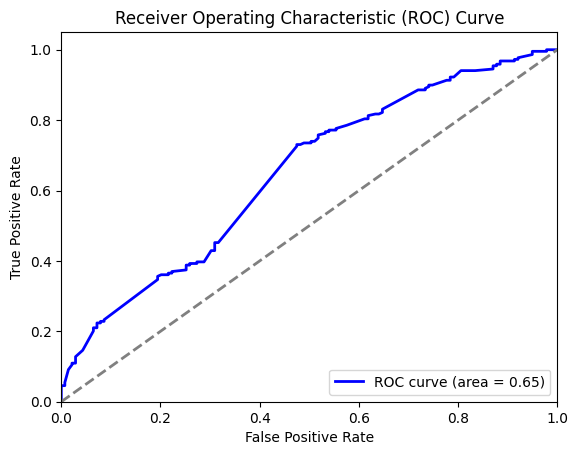

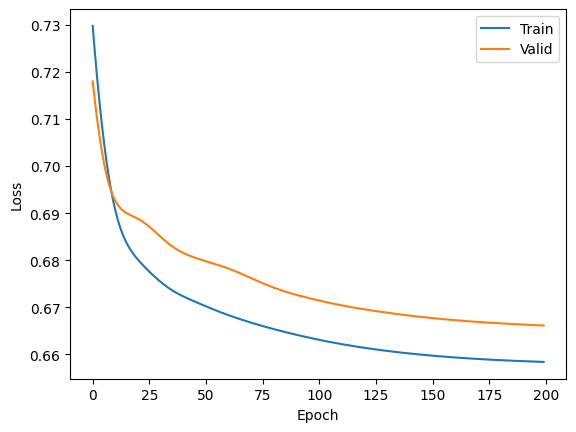

In [ ]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df_optimal,
    'epochs': 200,
    'lr': 0.01,
    'dropout': 0,
    'weight_decay': 0.01,
    'split_type': "distribution",
    'task': 'baseline'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [ ]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.64
Standard Deviation of AUC: 0.01
Mean Accuracy: 0.61
Standard Deviation of Accuracy: 0.01


Epoch [10/200], Loss: 0.6797, Loss Valid: 0.6771, Accuracy Valid: 0.6078
Epoch [20/200], Loss: 0.6757, Loss Valid: 0.6724, Accuracy Valid: 0.6078
Epoch [30/200], Loss: 0.6733, Loss Valid: 0.6686, Accuracy Valid: 0.6078
Epoch [40/200], Loss: 0.6717, Loss Valid: 0.6662, Accuracy Valid: 0.6078
Epoch [50/200], Loss: 0.6708, Loss Valid: 0.6650, Accuracy Valid: 0.6078
Epoch [60/200], Loss: 0.6702, Loss Valid: 0.6642, Accuracy Valid: 0.6078
Epoch [70/200], Loss: 0.6699, Loss Valid: 0.6636, Accuracy Valid: 0.6078
Epoch [80/200], Loss: 0.6697, Loss Valid: 0.6630, Accuracy Valid: 0.6078
Epoch [90/200], Loss: 0.6696, Loss Valid: 0.6628, Accuracy Valid: 0.6078
Epoch [100/200], Loss: 0.6695, Loss Valid: 0.6628, Accuracy Valid: 0.6078
Epoch [110/200], Loss: 0.6695, Loss Valid: 0.6628, Accuracy Valid: 0.6078
Epoch [120/200], Loss: 0.6695, Loss Valid: 0.6628, Accuracy Valid: 0.6078
Epoch [130/200], Loss: 0.6695, Loss Valid: 0.6628, Accuracy Valid: 0.6078
Epoch [140/200], Loss: 0.6695, Loss Valid: 0.66

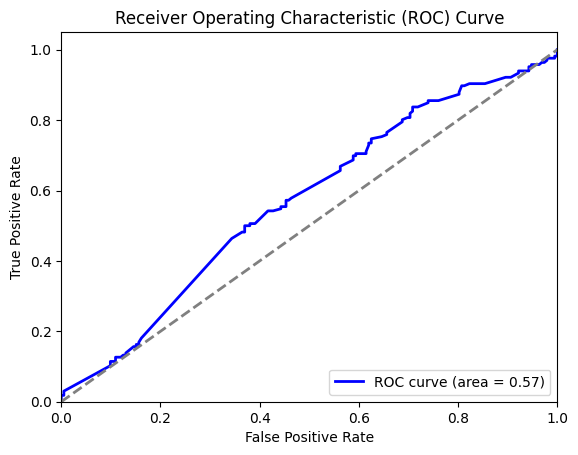

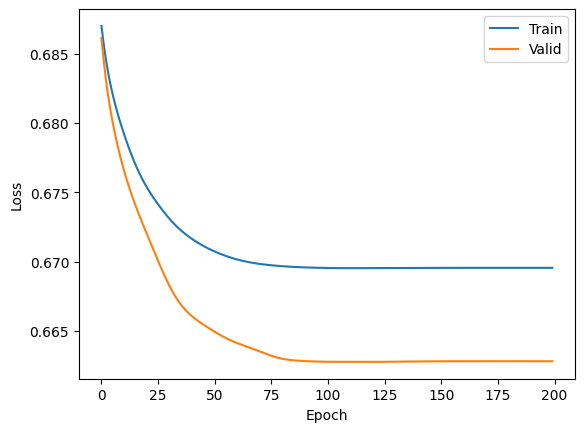

In [ ]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df_optimal,
    'epochs': 200,
    'lr': 0.01,
    'dropout': 0,
    'weight_decay': 0.01,
    'split_type': "median",
    'task': 'baseline'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [ ]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.56
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.58
Standard Deviation of Accuracy: 0.01


### LSTM

Epoch [10/150], Loss: 0.6695, Loss Valid: 0.6748, Accuracy Valid: 0.5938
Epoch [20/150], Loss: 0.6574, Loss Valid: 0.6621, Accuracy Valid: 0.6190
Epoch [30/150], Loss: 0.6569, Loss Valid: 0.6630, Accuracy Valid: 0.6106
Epoch [40/150], Loss: 0.6565, Loss Valid: 0.6631, Accuracy Valid: 0.6106
Epoch [50/150], Loss: 0.6551, Loss Valid: 0.6673, Accuracy Valid: 0.6134
Epoch [60/150], Loss: 0.6514, Loss Valid: 0.6715, Accuracy Valid: 0.6162
Epoch [70/150], Loss: 0.6524, Loss Valid: 0.6760, Accuracy Valid: 0.6106
Epoch [80/150], Loss: 0.6494, Loss Valid: 0.6738, Accuracy Valid: 0.6050
Epoch [90/150], Loss: 0.6437, Loss Valid: 0.6799, Accuracy Valid: 0.6134
Epoch [100/150], Loss: 0.6405, Loss Valid: 0.6898, Accuracy Valid: 0.5994
Epoch [110/150], Loss: 0.6354, Loss Valid: 0.6895, Accuracy Valid: 0.6106
Epoch [120/150], Loss: 0.6517, Loss Valid: 0.6856, Accuracy Valid: 0.5966
Epoch [130/150], Loss: 0.6413, Loss Valid: 0.6810, Accuracy Valid: 0.6022
Epoch [140/150], Loss: 0.6347, Loss Valid: 0.67

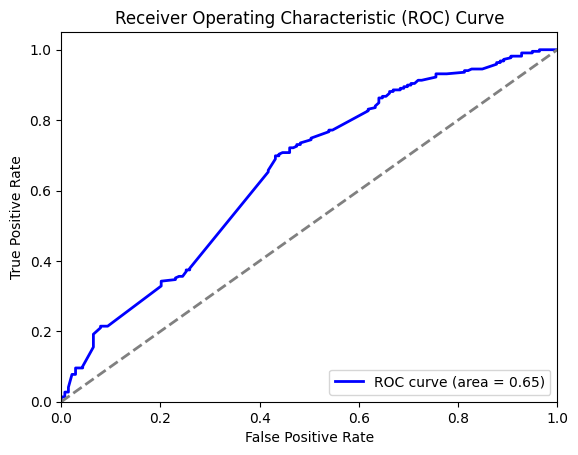

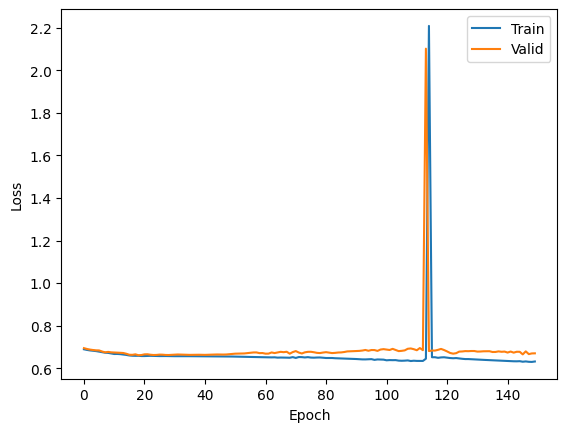

In [ ]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df_optimal,
    'epochs': 150,
    'lr': 0.01,
    'weight_decay': 0,
    'dropout': 0.2,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'baseline'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [ ]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.62
Standard Deviation of AUC: 0.01
Mean Accuracy: 0.60
Standard Deviation of Accuracy: 0.01


Epoch [10/150], Loss: 0.6775, Loss Valid: 0.6698, Accuracy Valid: 0.6078
Epoch [20/150], Loss: 0.6738, Loss Valid: 0.6654, Accuracy Valid: 0.6078
Epoch [30/150], Loss: 0.6705, Loss Valid: 0.6588, Accuracy Valid: 0.5882
Epoch [40/150], Loss: 0.6700, Loss Valid: 0.6586, Accuracy Valid: 0.6078
Epoch [50/150], Loss: 0.6683, Loss Valid: 0.6573, Accuracy Valid: 0.6078
Epoch [60/150], Loss: 0.6671, Loss Valid: 0.6576, Accuracy Valid: 0.5910
Epoch [70/150], Loss: 0.6648, Loss Valid: 0.6596, Accuracy Valid: 0.5994
Epoch [80/150], Loss: 0.6615, Loss Valid: 0.6578, Accuracy Valid: 0.6078
Epoch [90/150], Loss: 0.6597, Loss Valid: 0.6703, Accuracy Valid: 0.5966
Epoch [100/150], Loss: 0.6563, Loss Valid: 0.6623, Accuracy Valid: 0.5994
Epoch [110/150], Loss: 0.6525, Loss Valid: 0.6686, Accuracy Valid: 0.5938
Epoch [120/150], Loss: 0.6451, Loss Valid: 0.6822, Accuracy Valid: 0.6022
Epoch [130/150], Loss: 0.6472, Loss Valid: 0.6980, Accuracy Valid: 0.5938
Epoch [140/150], Loss: 0.6369, Loss Valid: 0.70

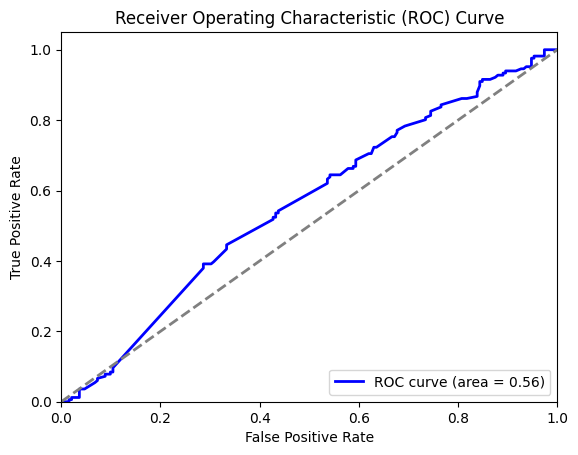

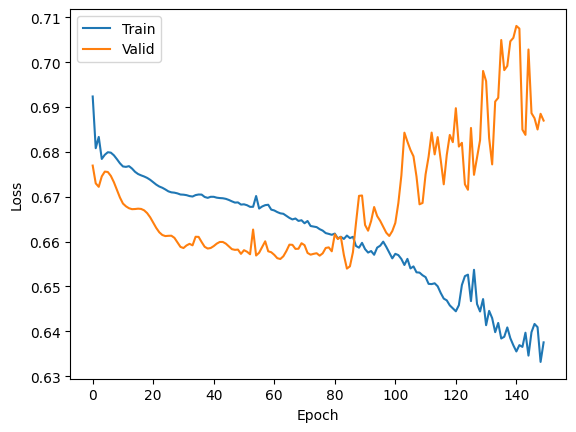

In [ ]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df_optimal,
    'epochs': 150,
    'lr': 0.01,
    'weight_decay': 0,
    'dropout': 0.2,
    'hidden_dim': 100,
    'split_type': "median",
    'task': 'baseline'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

### 2. Experiment #2: predict world space, using code, error and world

### Penalty: 0.1

### Logistic regression

Epoch [10/100], Loss: 0.6654, Validation Loss: 0.6304, Validation Accuracy: 0.6693
Epoch [20/100], Loss: 0.6617, Validation Loss: 0.6295, Validation Accuracy: 0.6693
Epoch [30/100], Loss: 0.6605, Validation Loss: 0.6300, Validation Accuracy: 0.6667
Epoch [40/100], Loss: 0.6601, Validation Loss: 0.6286, Validation Accuracy: 0.6720
Epoch [50/100], Loss: 0.6600, Validation Loss: 0.6276, Validation Accuracy: 0.6747
Epoch [60/100], Loss: 0.6601, Validation Loss: 0.6279, Validation Accuracy: 0.6720
Epoch [70/100], Loss: 0.6601, Validation Loss: 0.6289, Validation Accuracy: 0.6720
Epoch [80/100], Loss: 0.6601, Validation Loss: 0.6293, Validation Accuracy: 0.6720
Epoch [90/100], Loss: 0.6600, Validation Loss: 0.6290, Validation Accuracy: 0.6720
Epoch [100/100], Loss: 0.6600, Validation Loss: 0.6289, Validation Accuracy: 0.6720
Average Validation Accuracy: 0.6690
Test Accuracy: 64.10%
ROC AUC: 0.5361


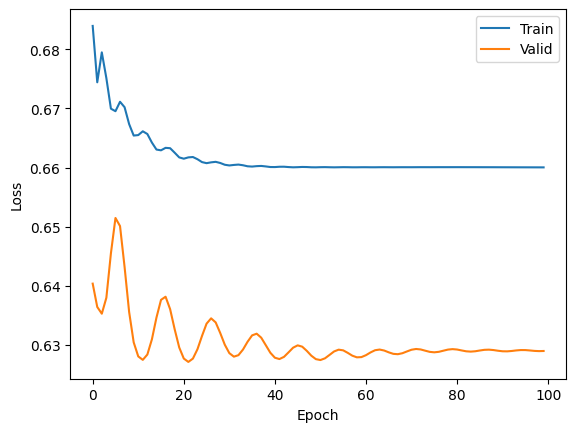

In [10]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 100,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'split_type': "distribution",
    'task': 'code_error_n_world_n_prev',
    'one_hot': True
}

train_losses, valid_losses, roc_auc, accuracy, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [11]:
results = cross_validate(**args, k=5)

Fold 1/5
Test Accuracy: 60.75%
ROC AUC: 0.5779
Fold 2/5
Test Accuracy: 60.54%
ROC AUC: 0.5879
Fold 3/5
Test Accuracy: 61.73%
ROC AUC: 0.5799
Fold 4/5
Test Accuracy: 65.38%
ROC AUC: 0.6103
Fold 5/5
Test Accuracy: 62.13%
ROC AUC: 0.6237


In [14]:
results

[{'Fold': 1, 'Test Accuracy': '60.75%', 'ROC AUC': '0.5779'},
 {'Fold': 2, 'Test Accuracy': '60.54%', 'ROC AUC': '0.5879'},
 {'Fold': 3, 'Test Accuracy': '61.73%', 'ROC AUC': '0.5799'},
 {'Fold': 4, 'Test Accuracy': '65.38%', 'ROC AUC': '0.6103'},
 {'Fold': 5, 'Test Accuracy': '62.13%', 'ROC AUC': '0.6237'},
 {'Mean AUC': '0.60',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.62',
  'Standard Deviation of Accuracy': '0.02'}]

Train: torch.Size([3004, 89]), Test: torch.Size([567, 89]), Valid: torch.Size([307, 89])
Epoch [10/300], Loss: 0.6719, Loss Valid: 0.6612, Accuracy Valid: 0.6091
Epoch [20/300], Loss: 0.6646, Loss Valid: 0.6612, Accuracy Valid: 0.6091
Epoch [30/300], Loss: 0.6601, Loss Valid: 0.6590, Accuracy Valid: 0.6091
Epoch [40/300], Loss: 0.6566, Loss Valid: 0.6538, Accuracy Valid: 0.6091
Epoch [50/300], Loss: 0.6544, Loss Valid: 0.6534, Accuracy Valid: 0.6026
Epoch [60/300], Loss: 0.6529, Loss Valid: 0.6516, Accuracy Valid: 0.6059
Epoch [70/300], Loss: 0.6517, Loss Valid: 0.6513, Accuracy Valid: 0.6026
Epoch [80/300], Loss: 0.6508, Loss Valid: 0.6510, Accuracy Valid: 0.6026
Epoch [90/300], Loss: 0.6501, Loss Valid: 0.6510, Accuracy Valid: 0.6059
Epoch [100/300], Loss: 0.6496, Loss Valid: 0.6510, Accuracy Valid: 0.6059
Epoch [110/300], Loss: 0.6492, Loss Valid: 0.6510, Accuracy Valid: 0.6059
Epoch [120/300], Loss: 0.6488, Loss Valid: 0.6510, Accuracy Valid: 0.6059
Epoch [130/300], Loss: 0.6485, L

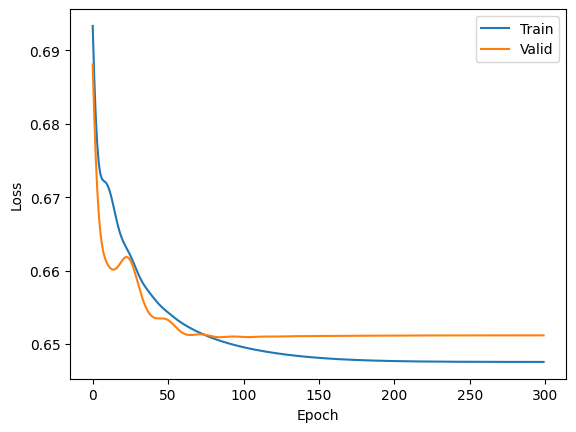

In [16]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'split_type': "distribution",
    'task': 'code_error_n_world_n_prev'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [17]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.60
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.62
Standard Deviation of Accuracy: 0.02


### LSTM

In [ ]:
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.05,
    'weight_decay': 0,
    'dropout':0.1,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n_world_n_prev',
    'one_hot': True,
    'k': 5
}

results = cross_validate(**args, k=5)
save_results(args, results, "prediction_experiments.json")

Epoch [10/150], Loss: 0.6666, Validation Loss: 0.6730, Validation Accuracy: 0.6302
Epoch [20/150], Loss: 0.6831, Validation Loss: 0.6473, Validation Accuracy: 0.6479
Epoch [30/150], Loss: 0.6660, Validation Loss: 0.6468, Validation Accuracy: 0.6479
Epoch [40/150], Loss: 0.6637, Validation Loss: 0.6462, Validation Accuracy: 0.6479
Epoch [50/150], Loss: 0.6605, Validation Loss: 0.6470, Validation Accuracy: 0.6479
Epoch [60/150], Loss: 0.6588, Validation Loss: 0.6396, Validation Accuracy: 0.6479
Epoch [70/150], Loss: 0.6580, Validation Loss: 0.6362, Validation Accuracy: 0.6479
Epoch [80/150], Loss: 0.6579, Validation Loss: 0.6357, Validation Accuracy: 0.6479
Epoch [90/150], Loss: 0.6575, Validation Loss: 0.6361, Validation Accuracy: 0.6479
Epoch [100/150], Loss: 0.6572, Validation Loss: 0.6352, Validation Accuracy: 0.6479
Epoch [110/150], Loss: 0.6570, Validation Loss: 0.6344, Validation Accuracy: 0.6479
Epoch [120/150], Loss: 0.6569, Validation Loss: 0.6326, Validation Accuracy: 0.6479
E

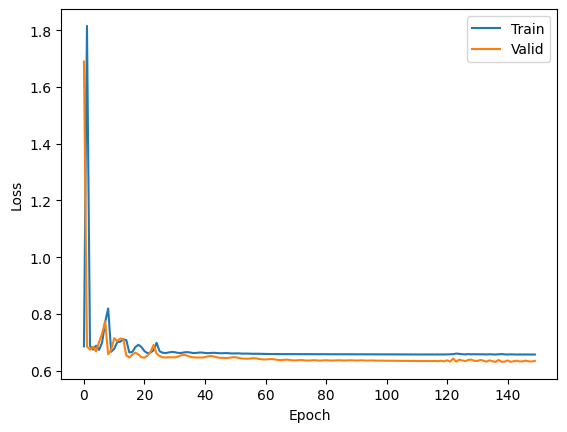

In [15]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.05,
    'weight_decay': 0,
    'dropout':0.1,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n_world_n_prev',
    'one_hot': True
}

train_losses, valid_losses, roc_auc, accuracy, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [16]:
results = cross_validate(**args, k=5)
results

Fold 1/5
Test Accuracy: 58.66%
ROC AUC: 0.5557
Fold 2/5
Test Accuracy: 62.08%
ROC AUC: 0.5441
Fold 3/5
Test Accuracy: 61.44%
ROC AUC: 0.5246
Fold 4/5
Test Accuracy: 66.52%
ROC AUC: 0.5624
Fold 5/5
Test Accuracy: 61.86%
ROC AUC: 0.6132


[{'Fold': 1, 'Test Accuracy': '58.66%', 'ROC AUC': '0.5557'},
 {'Fold': 2, 'Test Accuracy': '62.08%', 'ROC AUC': '0.5441'},
 {'Fold': 3, 'Test Accuracy': '61.44%', 'ROC AUC': '0.5246'},
 {'Fold': 4, 'Test Accuracy': '66.52%', 'ROC AUC': '0.5624'},
 {'Fold': 5, 'Test Accuracy': '61.86%', 'ROC AUC': '0.6132'},
 {'Mean AUC': '0.56',
  'Standard Deviation of AUC': '0.03',
  'Mean Accuracy': '0.62',
  'Standard Deviation of Accuracy': '0.03'}]

Train: torch.Size([3004, 89]), Test: torch.Size([567, 89]), Valid: torch.Size([307, 89])
Epoch [10/150], Loss: 0.7684, Loss Valid: 0.6766, Accuracy Valid: 0.6091
Epoch [20/150], Loss: 0.6781, Loss Valid: 0.6701, Accuracy Valid: 0.6091
Epoch [30/150], Loss: 0.6697, Loss Valid: 0.6866, Accuracy Valid: 0.6091
Epoch [40/150], Loss: 0.6745, Loss Valid: 0.6727, Accuracy Valid: 0.6091
Epoch [50/150], Loss: 0.6651, Loss Valid: 0.6716, Accuracy Valid: 0.6091
Epoch [60/150], Loss: 0.6658, Loss Valid: 0.6688, Accuracy Valid: 0.6091
Epoch [70/150], Loss: 0.6644, Loss Valid: 0.6681, Accuracy Valid: 0.6091
Epoch [80/150], Loss: 0.6638, Loss Valid: 0.6680, Accuracy Valid: 0.6091
Epoch [90/150], Loss: 0.6635, Loss Valid: 0.6675, Accuracy Valid: 0.6091
Epoch [100/150], Loss: 0.6630, Loss Valid: 0.6673, Accuracy Valid: 0.6091
Epoch [110/150], Loss: 0.6626, Loss Valid: 0.6671, Accuracy Valid: 0.6091
Epoch [120/150], Loss: 0.6622, Loss Valid: 0.6669, Accuracy Valid: 0.6091
Epoch [130/150], Loss: 0.6618, L

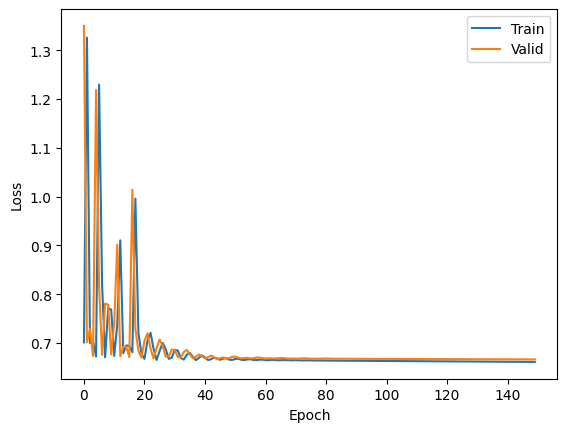

In [18]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.05,
    'weight_decay': 0,
    'dropout':0.1,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n_world_n_prev'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [19]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.61
Standard Deviation of AUC: 0.04
Mean Accuracy: 0.63
Standard Deviation of Accuracy: 0.02


In [30]:
# Set up the arguments for the training
args = {
    'model_type': 'rf',
    'data': df,
    'epochs': 150,
    'lr': 0.05,
    'weight_decay': 0,
    'dropout':0.1,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n_world_n_prev'
}

results = cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


In [31]:
results

[{'Fold': 1, 'Test Accuracy': '63.73%', 'ROC AUC': '0.6398'},
 {'Fold': 2, 'Test Accuracy': '65.68%', 'ROC AUC': '0.6480'},
 {'Fold': 3, 'Test Accuracy': '67.60%', 'ROC AUC': '0.6715'},
 {'Fold': 4, 'Test Accuracy': '68.81%', 'ROC AUC': '0.6659'},
 {'Fold': 5, 'Test Accuracy': '66.98%', 'ROC AUC': '0.6709'},
 {'Mean AUC': '0.66',
  'Standard Deviation of AUC': '0.01',
  'Mean Accuracy': '0.67',
  'Standard Deviation of Accuracy': '0.02'}]

### 3. Experiment #3: predict world space, using code and error

### Logistic

In [45]:
# Set up the arguments for the training
args = {
    'model_type': 'rf',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n'
}

results = cross_validate(**args, k=5)
results

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


[{'Fold': 1, 'Test Accuracy': '64.18%', 'ROC AUC': '0.6521'},
 {'Fold': 2, 'Test Accuracy': '65.55%', 'ROC AUC': '0.6471'},
 {'Fold': 3, 'Test Accuracy': '65.40%', 'ROC AUC': '0.6272'},
 {'Fold': 4, 'Test Accuracy': '69.67%', 'ROC AUC': '0.6839'},
 {'Fold': 5, 'Test Accuracy': '65.77%', 'ROC AUC': '0.6624'},
 {'Mean AUC': '0.65',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.66',
  'Standard Deviation of Accuracy': '0.02'}]

In [59]:
import json
import os

args_to_save = {k: v for k, v in args.items() if k != 'data'}

# File path
file_path = 'results.json'

# Read the existing content
if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        try:
            existing_data = json.load(f)
        except json.JSONDecodeError:
            existing_data = []
else:
    existing_data = []

# Append the new results
existing_data.append({"args": args_to_save, "results": results})

# Write the updated list back to the file
with open(file_path, 'w') as f:
    json.dump(existing_data, f, indent=4)


Train: torch.Size([3004, 60]), Test: torch.Size([567, 60]), Valid: torch.Size([307, 60])
Epoch [10/300], Loss: 0.6725, Loss Valid: 0.6673, Accuracy Valid: 0.6091
Epoch [20/300], Loss: 0.6644, Loss Valid: 0.6554, Accuracy Valid: 0.6091
Epoch [30/300], Loss: 0.6583, Loss Valid: 0.6487, Accuracy Valid: 0.6091
Epoch [40/300], Loss: 0.6540, Loss Valid: 0.6403, Accuracy Valid: 0.6156
Epoch [50/300], Loss: 0.6512, Loss Valid: 0.6350, Accuracy Valid: 0.6124
Epoch [60/300], Loss: 0.6495, Loss Valid: 0.6323, Accuracy Valid: 0.6938
Epoch [70/300], Loss: 0.6484, Loss Valid: 0.6299, Accuracy Valid: 0.6971
Epoch [80/300], Loss: 0.6477, Loss Valid: 0.6286, Accuracy Valid: 0.6938
Epoch [90/300], Loss: 0.6473, Loss Valid: 0.6278, Accuracy Valid: 0.7068
Epoch [100/300], Loss: 0.6471, Loss Valid: 0.6273, Accuracy Valid: 0.7036
Epoch [110/300], Loss: 0.6469, Loss Valid: 0.6270, Accuracy Valid: 0.7003
Epoch [120/300], Loss: 0.6468, Loss Valid: 0.6269, Accuracy Valid: 0.7003
Epoch [130/300], Loss: 0.6468, L

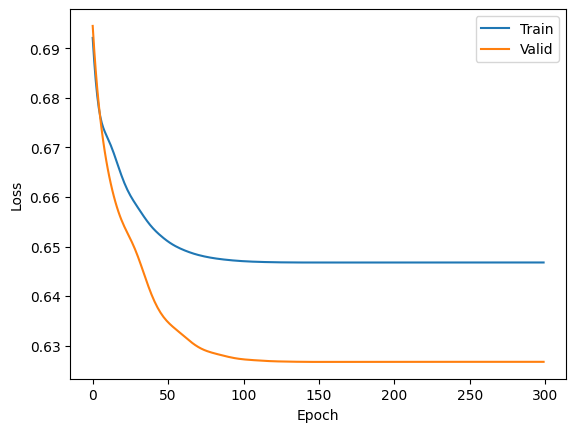

In [16]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [17]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.61
Standard Deviation of AUC: 0.03
Mean Accuracy: 0.65
Standard Deviation of Accuracy: 0.02


In [35]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n', 
    'one_hot': True
}

results = cross_validate(**args, k=5)
results

Fold 1/5
Test Accuracy: 64.03%
ROC AUC: 0.6336
Fold 2/5
Test Accuracy: 65.04%
ROC AUC: 0.6202
Fold 3/5
Test Accuracy: 65.69%
ROC AUC: 0.6009
Fold 4/5
Test Accuracy: 65.38%
ROC AUC: 0.6526
Fold 5/5
Test Accuracy: 66.71%
ROC AUC: 0.6061


[{'Fold': 1, 'Test Accuracy': '64.03%', 'ROC AUC': '0.6336'},
 {'Fold': 2, 'Test Accuracy': '65.04%', 'ROC AUC': '0.6202'},
 {'Fold': 3, 'Test Accuracy': '65.69%', 'ROC AUC': '0.6009'},
 {'Fold': 4, 'Test Accuracy': '65.38%', 'ROC AUC': '0.6526'},
 {'Fold': 5, 'Test Accuracy': '66.71%', 'ROC AUC': '0.6061'},
 {'Mean AUC': '0.62',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.65',
  'Standard Deviation of Accuracy': '0.01'}]

### LSTM

Train: torch.Size([3004, 60]), Test: torch.Size([567, 60]), Valid: torch.Size([307, 60])
Epoch [10/150], Loss: 0.6695, Loss Valid: 0.6665, Accuracy Valid: 0.6091
Epoch [20/150], Loss: 0.6597, Loss Valid: 0.6517, Accuracy Valid: 0.6091
Epoch [30/150], Loss: 0.6498, Loss Valid: 0.6259, Accuracy Valid: 0.6971
Epoch [40/150], Loss: 0.6726, Loss Valid: 0.6206, Accuracy Valid: 0.7036
Epoch [50/150], Loss: 0.6802, Loss Valid: 0.6679, Accuracy Valid: 0.6091
Epoch [60/150], Loss: 0.6434, Loss Valid: 0.6286, Accuracy Valid: 0.6710
Epoch [70/150], Loss: 0.6336, Loss Valid: 0.6192, Accuracy Valid: 0.6938
Epoch [80/150], Loss: 0.6256, Loss Valid: 0.6125, Accuracy Valid: 0.6873
Epoch [90/150], Loss: 0.6187, Loss Valid: 0.6124, Accuracy Valid: 0.6906
Epoch [100/150], Loss: 0.6106, Loss Valid: 0.6074, Accuracy Valid: 0.6547
Epoch [110/150], Loss: 0.6019, Loss Valid: 0.6194, Accuracy Valid: 0.6515
Epoch [120/150], Loss: 0.5897, Loss Valid: 0.6128, Accuracy Valid: 0.6743
Epoch [130/150], Loss: 0.5799, L

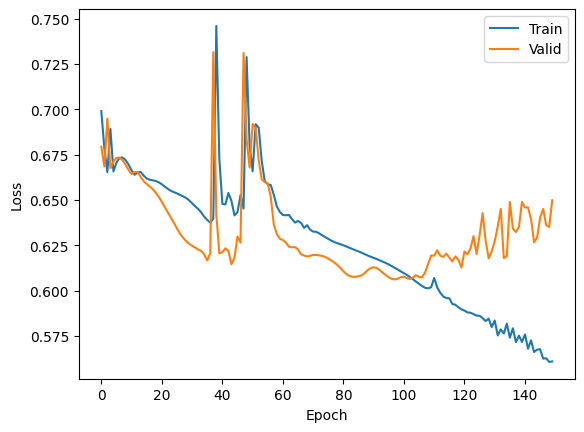

In [18]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.01,
    'weight_decay': 0,
    'dropout':0.2,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [19]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.66
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.66
Standard Deviation of Accuracy: 0.01


### 4. Experiment 4: predicting world with error and code (1 step behind)

### Penalty: 0.1

#### Logistic

Train: 609, Test: 153, Valid: 76
Epoch [10/300], Loss: 0.6694, Loss Valid: 0.6572, Accuracy Valid: 0.6091
Epoch [20/300], Loss: 0.6672, Loss Valid: 0.6552, Accuracy Valid: 0.6091
Epoch [30/300], Loss: 0.6641, Loss Valid: 0.6586, Accuracy Valid: 0.6091
Epoch [40/300], Loss: 0.6626, Loss Valid: 0.6580, Accuracy Valid: 0.6091
Epoch [50/300], Loss: 0.6612, Loss Valid: 0.6557, Accuracy Valid: 0.6091
Epoch [60/300], Loss: 0.6604, Loss Valid: 0.6557, Accuracy Valid: 0.6091
Epoch [70/300], Loss: 0.6598, Loss Valid: 0.6557, Accuracy Valid: 0.6091
Epoch [80/300], Loss: 0.6595, Loss Valid: 0.6552, Accuracy Valid: 0.6091
Epoch [90/300], Loss: 0.6592, Loss Valid: 0.6551, Accuracy Valid: 0.6091
Epoch [100/300], Loss: 0.6590, Loss Valid: 0.6550, Accuracy Valid: 0.6091
Epoch [110/300], Loss: 0.6589, Loss Valid: 0.6549, Accuracy Valid: 0.6091
Epoch [120/300], Loss: 0.6589, Loss Valid: 0.6549, Accuracy Valid: 0.6091
Epoch [130/300], Loss: 0.6588, Loss Valid: 0.6548, Accuracy Valid: 0.6091
Epoch [140/300

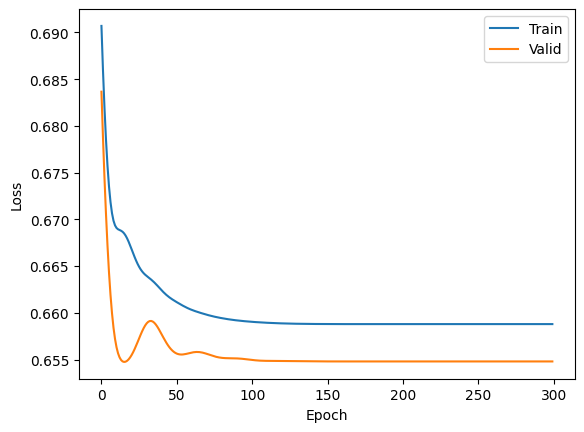

In [39]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n_prev'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [40]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.56
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.62
Standard Deviation of Accuracy: 0.02


#### LSTM

Train: 609, Test: 153, Valid: 76
Epoch [10/150], Loss: 0.6803, Loss Valid: 0.6802, Accuracy Valid: 0.6091
Epoch [20/150], Loss: 0.6697, Loss Valid: 0.6704, Accuracy Valid: 0.6091
Epoch [30/150], Loss: 0.6670, Loss Valid: 0.6693, Accuracy Valid: 0.6091
Epoch [40/150], Loss: 0.6662, Loss Valid: 0.6694, Accuracy Valid: 0.6091
Epoch [50/150], Loss: 0.6658, Loss Valid: 0.6690, Accuracy Valid: 0.6091
Epoch [60/150], Loss: 0.6655, Loss Valid: 0.6692, Accuracy Valid: 0.6091
Epoch [70/150], Loss: 0.6652, Loss Valid: 0.6689, Accuracy Valid: 0.6091
Epoch [80/150], Loss: 0.6645, Loss Valid: 0.6688, Accuracy Valid: 0.6091
Epoch [90/150], Loss: 0.6624, Loss Valid: 0.6632, Accuracy Valid: 0.6091
Epoch [100/150], Loss: 0.6641, Loss Valid: 0.6637, Accuracy Valid: 0.6091
Epoch [110/150], Loss: 0.6643, Loss Valid: 0.6630, Accuracy Valid: 0.6091
Epoch [120/150], Loss: 0.6628, Loss Valid: 0.6618, Accuracy Valid: 0.6091
Epoch [130/150], Loss: 0.6608, Loss Valid: 0.6597, Accuracy Valid: 0.6091
Epoch [140/150

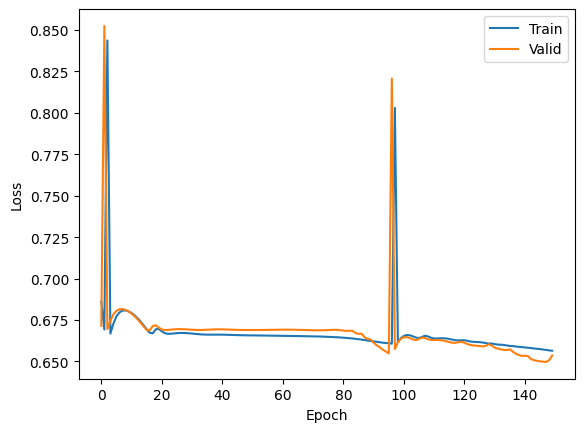

In [41]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.01,
    'weight_decay': 0,
    'dropout':0.2,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n_prev'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [42]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.56
Standard Deviation of AUC: 0.03
Mean Accuracy: 0.61
Standard Deviation of Accuracy: 0.02


### 5.  Experiment 5: predict with only the nth point of code and error 

In [39]:
# Set up the arguments for the training
args = {
    'model_type': 'rf',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n_only'
}

results = cross_validate(**args, k=5)
results

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


[{'Fold': 1, 'Test Accuracy': '58.66%', 'ROC AUC': '0.5381'},
 {'Fold': 2, 'Test Accuracy': '62.08%', 'ROC AUC': '0.5431'},
 {'Fold': 3, 'Test Accuracy': '61.44%', 'ROC AUC': '0.5514'},
 {'Fold': 4, 'Test Accuracy': '64.95%', 'ROC AUC': '0.5271'},
 {'Fold': 5, 'Test Accuracy': '61.86%', 'ROC AUC': '0.5773'},
 {'Mean AUC': '0.55',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.62',
  'Standard Deviation of Accuracy': '0.02'}]

### Logistic

In [37]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n_only', 
    'one_hot': True
}

results = cross_validate(**args, k=5)
results

Fold 1/5
Test Accuracy: 64.33%
ROC AUC: 0.6267
Fold 2/5
Test Accuracy: 66.07%
ROC AUC: 0.6091
Fold 3/5
Test Accuracy: 66.86%
ROC AUC: 0.6248
Fold 4/5
Test Accuracy: 68.10%
ROC AUC: 0.6387
Fold 5/5
Test Accuracy: 68.06%
ROC AUC: 0.6281


[{'Fold': 1, 'Test Accuracy': '64.33%', 'ROC AUC': '0.6267'},
 {'Fold': 2, 'Test Accuracy': '66.07%', 'ROC AUC': '0.6091'},
 {'Fold': 3, 'Test Accuracy': '66.86%', 'ROC AUC': '0.6248'},
 {'Fold': 4, 'Test Accuracy': '68.10%', 'ROC AUC': '0.6387'},
 {'Fold': 5, 'Test Accuracy': '68.06%', 'ROC AUC': '0.6281'},
 {'Mean AUC': '0.63',
  'Standard Deviation of AUC': '0.01',
  'Mean Accuracy': '0.67',
  'Standard Deviation of Accuracy': '0.01'}]

Train: torch.Size([3004, 1]), Test: torch.Size([567, 1]), Valid: torch.Size([307, 1])
Epoch [10/300], Loss: 0.7117, Loss Valid: 0.7268, Accuracy Valid: 0.6091
Epoch [20/300], Loss: 0.6928, Loss Valid: 0.7041, Accuracy Valid: 0.6091
Epoch [30/300], Loss: 0.6800, Loss Valid: 0.6883, Accuracy Valid: 0.6091
Epoch [40/300], Loss: 0.6725, Loss Valid: 0.6787, Accuracy Valid: 0.6091
Epoch [50/300], Loss: 0.6690, Loss Valid: 0.6736, Accuracy Valid: 0.6091
Epoch [60/300], Loss: 0.6675, Loss Valid: 0.6712, Accuracy Valid: 0.6091
Epoch [70/300], Loss: 0.6668, Loss Valid: 0.6699, Accuracy Valid: 0.6091
Epoch [80/300], Loss: 0.6663, Loss Valid: 0.6691, Accuracy Valid: 0.6091
Epoch [90/300], Loss: 0.6659, Loss Valid: 0.6684, Accuracy Valid: 0.6091
Epoch [100/300], Loss: 0.6654, Loss Valid: 0.6678, Accuracy Valid: 0.6091
Epoch [110/300], Loss: 0.6651, Loss Valid: 0.6673, Accuracy Valid: 0.6091
Epoch [120/300], Loss: 0.6648, Loss Valid: 0.6669, Accuracy Valid: 0.6091
Epoch [130/300], Loss: 0.6645, Loss

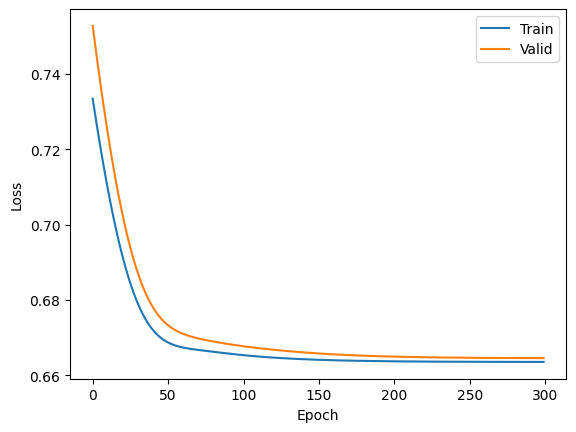

In [6]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n_only'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [7]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.55
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.62
Standard Deviation of Accuracy: 0.02


### LSTM

Train: torch.Size([3004, 1]), Test: torch.Size([567, 1]), Valid: torch.Size([307, 1])
Epoch [10/150], Loss: 0.6681, Loss Valid: 0.6734, Accuracy Valid: 0.6091
Epoch [20/150], Loss: 0.6646, Loss Valid: 0.6664, Accuracy Valid: 0.6091
Epoch [30/150], Loss: 0.6634, Loss Valid: 0.6635, Accuracy Valid: 0.6091
Epoch [40/150], Loss: 0.6635, Loss Valid: 0.6627, Accuracy Valid: 0.6091
Epoch [50/150], Loss: 0.6634, Loss Valid: 0.6631, Accuracy Valid: 0.6091
Epoch [60/150], Loss: 0.6634, Loss Valid: 0.6634, Accuracy Valid: 0.6091
Epoch [70/150], Loss: 0.6633, Loss Valid: 0.6632, Accuracy Valid: 0.6091
Epoch [80/150], Loss: 0.6633, Loss Valid: 0.6631, Accuracy Valid: 0.6091
Epoch [90/150], Loss: 0.6633, Loss Valid: 0.6630, Accuracy Valid: 0.6091
Epoch [100/150], Loss: 0.6633, Loss Valid: 0.6631, Accuracy Valid: 0.6091
Epoch [110/150], Loss: 0.6633, Loss Valid: 0.6631, Accuracy Valid: 0.6091
Epoch [120/150], Loss: 0.6633, Loss Valid: 0.6630, Accuracy Valid: 0.6091
Epoch [130/150], Loss: 0.6633, Loss

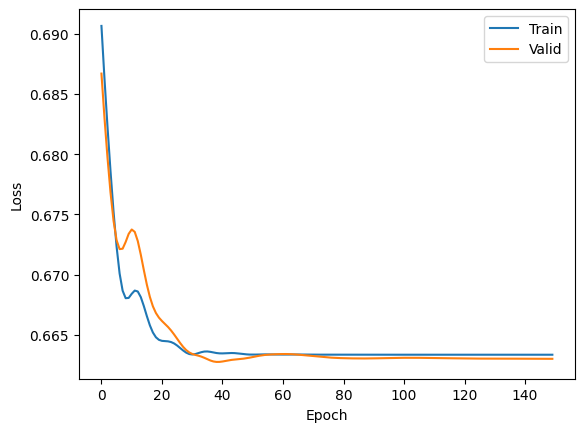

In [14]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.01,
    'weight_decay': 0,
    'dropout':0.2,
    'hidden_dim': 50,
    'split_type': "distribution",
    'task': 'code_error_n_only'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [15]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.55
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.62
Standard Deviation of Accuracy: 0.02


### Experiment 6: predict with nth point of code

In [42]:
# Set up the arguments for the training
args = {
    'model_type': 'rf',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0.1,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_n_only'
}

results = cross_validate(**args, k=5)
results

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


[{'Fold': 1, 'Test Accuracy': '64.33%', 'ROC AUC': '0.5995'},
 {'Fold': 2, 'Test Accuracy': '66.07%', 'ROC AUC': '0.5901'},
 {'Fold': 3, 'Test Accuracy': '66.86%', 'ROC AUC': '0.6093'},
 {'Fold': 4, 'Test Accuracy': '68.10%', 'ROC AUC': '0.6031'},
 {'Fold': 5, 'Test Accuracy': '68.06%', 'ROC AUC': '0.6212'},
 {'Mean AUC': '0.60',
  'Standard Deviation of AUC': '0.01',
  'Mean Accuracy': '0.67',
  'Standard Deviation of Accuracy': '0.01'}]

### logistic regression

In [40]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0.1,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_n_only', 
    'one_hot': True
}

results = cross_validate(**args, k=5)
results

Fold 1/5
Test Accuracy: 64.33%
ROC AUC: 0.5995
Fold 2/5
Test Accuracy: 66.07%
ROC AUC: 0.5901
Fold 3/5
Test Accuracy: 66.86%
ROC AUC: 0.6093
Fold 4/5
Test Accuracy: 68.10%
ROC AUC: 0.6031
Fold 5/5
Test Accuracy: 68.06%
ROC AUC: 0.6212


[{'Fold': 1, 'Test Accuracy': '64.33%', 'ROC AUC': '0.5995'},
 {'Fold': 2, 'Test Accuracy': '66.07%', 'ROC AUC': '0.5901'},
 {'Fold': 3, 'Test Accuracy': '66.86%', 'ROC AUC': '0.6093'},
 {'Fold': 4, 'Test Accuracy': '68.10%', 'ROC AUC': '0.6031'},
 {'Fold': 5, 'Test Accuracy': '68.06%', 'ROC AUC': '0.6212'},
 {'Mean AUC': '0.60',
  'Standard Deviation of AUC': '0.01',
  'Mean Accuracy': '0.67',
  'Standard Deviation of Accuracy': '0.01'}]

In [41]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0.1,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_n_only'
}

results = cross_validate(**args, k=5)
results

Fold 1/5
Test Accuracy: 64.33%
ROC AUC: 0.5995
Fold 2/5
Test Accuracy: 66.07%
ROC AUC: 0.5901
Fold 3/5
Test Accuracy: 66.86%
ROC AUC: 0.6093
Fold 4/5
Test Accuracy: 68.10%
ROC AUC: 0.6031
Fold 5/5
Test Accuracy: 68.06%
ROC AUC: 0.6212


[{'Fold': 1, 'Test Accuracy': '64.33%', 'ROC AUC': '0.5995'},
 {'Fold': 2, 'Test Accuracy': '66.07%', 'ROC AUC': '0.5901'},
 {'Fold': 3, 'Test Accuracy': '66.86%', 'ROC AUC': '0.6093'},
 {'Fold': 4, 'Test Accuracy': '68.10%', 'ROC AUC': '0.6031'},
 {'Fold': 5, 'Test Accuracy': '68.06%', 'ROC AUC': '0.6212'},
 {'Mean AUC': '0.60',
  'Standard Deviation of AUC': '0.01',
  'Mean Accuracy': '0.67',
  'Standard Deviation of Accuracy': '0.01'}]

### LSTM

Train: torch.Size([3004, 1]), Test: torch.Size([567, 1]), Valid: torch.Size([307, 1])
Epoch [10/150], Loss: 0.6677, Loss Valid: 0.6664, Accuracy Valid: 0.6091
Epoch [20/150], Loss: 0.6564, Loss Valid: 0.6532, Accuracy Valid: 0.6091
Epoch [30/150], Loss: 0.6537, Loss Valid: 0.6500, Accuracy Valid: 0.6091
Epoch [40/150], Loss: 0.6520, Loss Valid: 0.6475, Accuracy Valid: 0.6091
Epoch [50/150], Loss: 0.6525, Loss Valid: 0.6486, Accuracy Valid: 0.6091
Epoch [60/150], Loss: 0.6534, Loss Valid: 0.6499, Accuracy Valid: 0.6091
Epoch [70/150], Loss: 0.6543, Loss Valid: 0.6511, Accuracy Valid: 0.6091
Epoch [80/150], Loss: 0.6548, Loss Valid: 0.6518, Accuracy Valid: 0.6091
Epoch [90/150], Loss: 0.6552, Loss Valid: 0.6523, Accuracy Valid: 0.6091
Epoch [100/150], Loss: 0.6554, Loss Valid: 0.6527, Accuracy Valid: 0.6091
Epoch [110/150], Loss: 0.6557, Loss Valid: 0.6530, Accuracy Valid: 0.6091
Epoch [120/150], Loss: 0.6558, Loss Valid: 0.6532, Accuracy Valid: 0.6091
Epoch [130/150], Loss: 0.6558, Loss

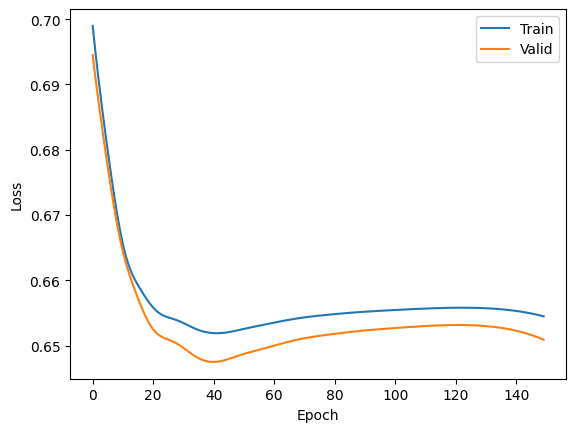

In [23]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0.2,
    'hidden_dim': 50,
    'split_type': "distribution",
    'task': 'code_n_only'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [24]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.60
Standard Deviation of AUC: 0.01
Mean Accuracy: 0.62
Standard Deviation of Accuracy: 0.03


### Experiment 7: predict with only nth point of error

Train: torch.Size([3004, 1]), Test: torch.Size([567, 1]), Valid: torch.Size([307, 1])
Epoch [10/300], Loss: 0.8674, Loss Valid: 0.8593, Accuracy Valid: 0.3909
Epoch [20/300], Loss: 0.8257, Loss Valid: 0.8203, Accuracy Valid: 0.3909
Epoch [30/300], Loss: 0.7899, Loss Valid: 0.7865, Accuracy Valid: 0.3909
Epoch [40/300], Loss: 0.7603, Loss Valid: 0.7580, Accuracy Valid: 0.3909
Epoch [50/300], Loss: 0.7364, Loss Valid: 0.7345, Accuracy Valid: 0.3909
Epoch [60/300], Loss: 0.7178, Loss Valid: 0.7157, Accuracy Valid: 0.5277
Epoch [70/300], Loss: 0.7035, Loss Valid: 0.7008, Accuracy Valid: 0.5277
Epoch [80/300], Loss: 0.6928, Loss Valid: 0.6893, Accuracy Valid: 0.5277
Epoch [90/300], Loss: 0.6849, Loss Valid: 0.6804, Accuracy Valid: 0.5277
Epoch [100/300], Loss: 0.6790, Loss Valid: 0.6737, Accuracy Valid: 0.5277
Epoch [110/300], Loss: 0.6748, Loss Valid: 0.6686, Accuracy Valid: 0.5277
Epoch [120/300], Loss: 0.6717, Loss Valid: 0.6648, Accuracy Valid: 0.5277
Epoch [130/300], Loss: 0.6694, Loss

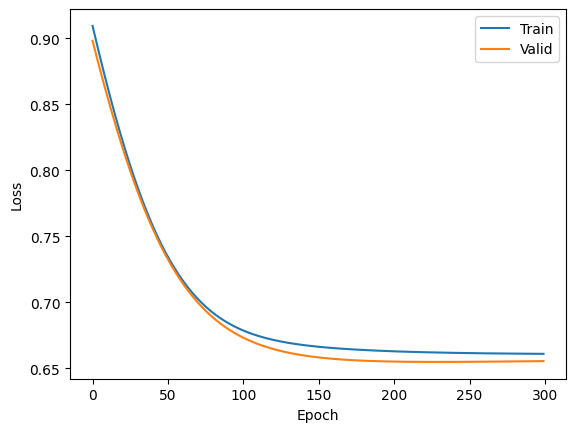

In [25]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'error_n_only'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [26]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.55
Standard Deviation of AUC: 0.01
Mean Accuracy: 0.62
Standard Deviation of Accuracy: 0.02


Train: torch.Size([3004, 1]), Test: torch.Size([567, 1]), Valid: torch.Size([307, 1])
Epoch [10/150], Loss: 0.6654, Loss Valid: 0.6663, Accuracy Valid: 0.6091
Epoch [20/150], Loss: 0.6642, Loss Valid: 0.6660, Accuracy Valid: 0.6091
Epoch [30/150], Loss: 0.6651, Loss Valid: 0.6665, Accuracy Valid: 0.6091
Epoch [40/150], Loss: 0.6647, Loss Valid: 0.6666, Accuracy Valid: 0.6091
Epoch [50/150], Loss: 0.6652, Loss Valid: 0.6674, Accuracy Valid: 0.6091
Epoch [60/150], Loss: 0.6655, Loss Valid: 0.6680, Accuracy Valid: 0.6091
Epoch [70/150], Loss: 0.6657, Loss Valid: 0.6685, Accuracy Valid: 0.6091
Epoch [80/150], Loss: 0.6658, Loss Valid: 0.6688, Accuracy Valid: 0.6091
Epoch [90/150], Loss: 0.6659, Loss Valid: 0.6690, Accuracy Valid: 0.6091
Epoch [100/150], Loss: 0.6659, Loss Valid: 0.6691, Accuracy Valid: 0.6091
Epoch [110/150], Loss: 0.6659, Loss Valid: 0.6692, Accuracy Valid: 0.6091
Epoch [120/150], Loss: 0.6659, Loss Valid: 0.6692, Accuracy Valid: 0.6091
Epoch [130/150], Loss: 0.6660, Loss

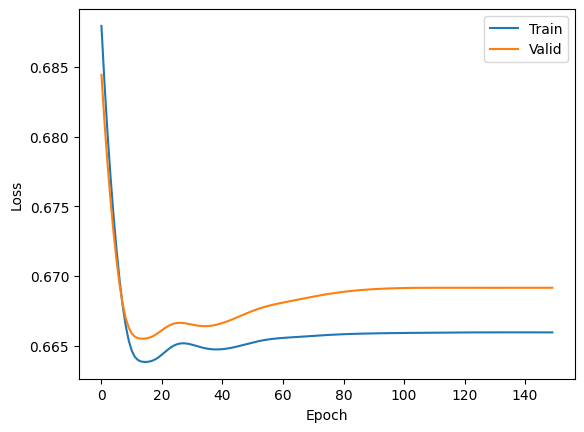

In [29]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0.2,
    'hidden_dim': 50,
    'split_type': "distribution",
    'task': 'error_n_only'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [30]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.55
Standard Deviation of AUC: 0.01
Mean Accuracy: 0.62
Standard Deviation of Accuracy: 0.02


### Experiment 9 : prediction with n-1th points of code space

### Logistic regression

Train: torch.Size([3004, 29]), Test: torch.Size([567, 29]), Valid: torch.Size([307, 29])
Epoch [10/300], Loss: 0.6931, Loss Valid: 0.6899, Accuracy Valid: 0.5342
Epoch [20/300], Loss: 0.6776, Loss Valid: 0.6655, Accuracy Valid: 0.6091
Epoch [30/300], Loss: 0.6728, Loss Valid: 0.6608, Accuracy Valid: 0.6091
Epoch [40/300], Loss: 0.6706, Loss Valid: 0.6598, Accuracy Valid: 0.6091
Epoch [50/300], Loss: 0.6687, Loss Valid: 0.6637, Accuracy Valid: 0.6091
Epoch [60/300], Loss: 0.6669, Loss Valid: 0.6644, Accuracy Valid: 0.6091
Epoch [70/300], Loss: 0.6652, Loss Valid: 0.6637, Accuracy Valid: 0.6091
Epoch [80/300], Loss: 0.6654, Loss Valid: 0.6647, Accuracy Valid: 0.6091
Epoch [90/300], Loss: 0.6637, Loss Valid: 0.6657, Accuracy Valid: 0.6091
Epoch [100/300], Loss: 0.6634, Loss Valid: 0.6671, Accuracy Valid: 0.6091
Epoch [110/300], Loss: 0.6627, Loss Valid: 0.6663, Accuracy Valid: 0.6091
Epoch [120/300], Loss: 0.6630, Loss Valid: 0.6668, Accuracy Valid: 0.6091
Epoch [130/300], Loss: 0.6624, L

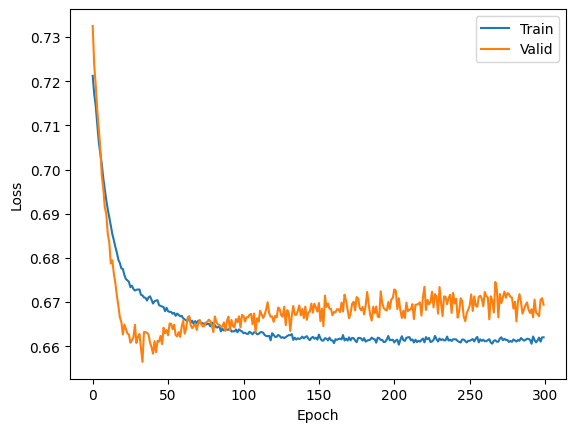

In [9]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0.1,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_n_prev_until'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [10]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.54
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.62
Standard Deviation of Accuracy: 0.02


### LSTM

Train: torch.Size([3004, 29]), Test: torch.Size([567, 29]), Valid: torch.Size([307, 29])
Epoch [10/150], Loss: 0.6656, Loss Valid: 0.6691, Accuracy Valid: 0.6091
Epoch [20/150], Loss: 0.6652, Loss Valid: 0.6691, Accuracy Valid: 0.6091
Epoch [30/150], Loss: 0.6656, Loss Valid: 0.6692, Accuracy Valid: 0.6091
Epoch [40/150], Loss: 0.6658, Loss Valid: 0.6692, Accuracy Valid: 0.6091
Epoch [50/150], Loss: 0.6658, Loss Valid: 0.6691, Accuracy Valid: 0.6091
Epoch [60/150], Loss: 0.6659, Loss Valid: 0.6691, Accuracy Valid: 0.6091
Epoch [70/150], Loss: 0.6659, Loss Valid: 0.6691, Accuracy Valid: 0.6091
Epoch [80/150], Loss: 0.6659, Loss Valid: 0.6691, Accuracy Valid: 0.6091
Epoch [90/150], Loss: 0.6659, Loss Valid: 0.6691, Accuracy Valid: 0.6091
Epoch [100/150], Loss: 0.6659, Loss Valid: 0.6691, Accuracy Valid: 0.6091
Epoch [110/150], Loss: 0.6659, Loss Valid: 0.6692, Accuracy Valid: 0.6091
Epoch [120/150], Loss: 0.6659, Loss Valid: 0.6692, Accuracy Valid: 0.6091
Epoch [130/150], Loss: 0.6659, L

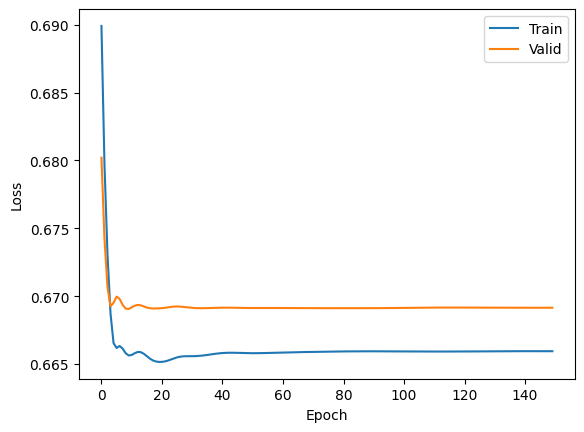

In [11]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0.2,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_n_prev_until'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [12]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.54
Standard Deviation of AUC: 0.01
Mean Accuracy: 0.62
Standard Deviation of Accuracy: 0.02


### Experiment 10: predict with the nth data points of code

### Logistic regression

In [53]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_n_until'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

ValueError: expected sequence of length 2 at dim 1 (got 3)

In [14]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.62
Standard Deviation of AUC: 0.01
Mean Accuracy: 0.67
Standard Deviation of Accuracy: 0.01


### LSTM

Train: torch.Size([3004, 30]), Test: torch.Size([567, 30]), Valid: torch.Size([307, 30])
Epoch [10/150], Loss: 0.6795, Loss Valid: 0.6785, Accuracy Valid: 0.6091
Epoch [20/150], Loss: 0.6612, Loss Valid: 0.6592, Accuracy Valid: 0.6091
Epoch [30/150], Loss: 0.6509, Loss Valid: 0.6485, Accuracy Valid: 0.6091
Epoch [40/150], Loss: 0.6397, Loss Valid: 0.6445, Accuracy Valid: 0.6678
Epoch [50/150], Loss: 0.6406, Loss Valid: 0.6527, Accuracy Valid: 0.6678
Epoch [60/150], Loss: 0.6356, Loss Valid: 0.6401, Accuracy Valid: 0.6678
Epoch [70/150], Loss: 0.6349, Loss Valid: 0.6339, Accuracy Valid: 0.6678
Epoch [80/150], Loss: 0.6335, Loss Valid: 0.6307, Accuracy Valid: 0.6678
Epoch [90/150], Loss: 0.6320, Loss Valid: 0.6365, Accuracy Valid: 0.6678
Epoch [100/150], Loss: 0.6294, Loss Valid: 0.6287, Accuracy Valid: 0.6678
Epoch [110/150], Loss: 0.6282, Loss Valid: 0.6261, Accuracy Valid: 0.6678
Epoch [120/150], Loss: 0.6287, Loss Valid: 0.6281, Accuracy Valid: 0.6645
Epoch [130/150], Loss: 0.6261, L

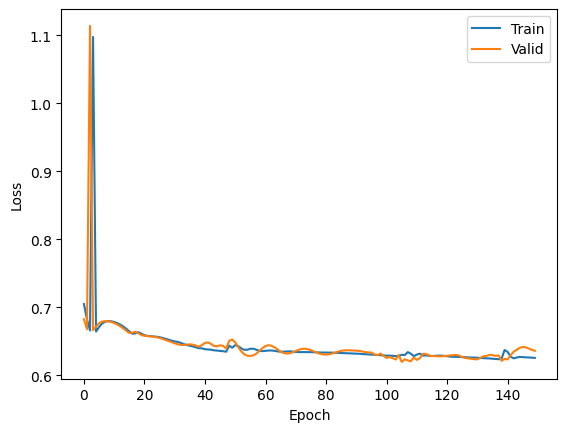

In [15]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.01,
    'weight_decay': 0,
    'dropout':0.2,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_n_until'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [16]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.65
Standard Deviation of AUC: 0.01
Mean Accuracy: 0.66
Standard Deviation of Accuracy: 0.02


### Experiment 11: code space nth sequences and nth value of error

In [52]:
# Set up the arguments for the training
args = {
    'model_type': 'rf',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_n_until_error_n'
}

results = cross_validate(**args, k=5)
results

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


[{'Fold': 1, 'Test Accuracy': '62.54%', 'ROC AUC': '0.6058'},
 {'Fold': 2, 'Test Accuracy': '65.17%', 'ROC AUC': '0.6330'},
 {'Fold': 3, 'Test Accuracy': '65.25%', 'ROC AUC': '0.6345'},
 {'Fold': 4, 'Test Accuracy': '67.53%', 'ROC AUC': '0.6596'},
 {'Fold': 5, 'Test Accuracy': '64.82%', 'ROC AUC': '0.6276'},
 {'Mean AUC': '0.63',
  'Standard Deviation of AUC': '0.02',
  'Mean Accuracy': '0.65',
  'Standard Deviation of Accuracy': '0.02'}]

### Logistic regression

In [51]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_n_until_error_n', 
    'one_hot': True
}

results = cross_validate(**args, k=5)
results

Fold 1/5
Test Accuracy: 64.48%
ROC AUC: 0.6468
Fold 2/5
Test Accuracy: 66.71%
ROC AUC: 0.6306
Fold 3/5
Test Accuracy: 67.60%
ROC AUC: 0.6414
Fold 4/5
Test Accuracy: 68.96%
ROC AUC: 0.6532
Fold 5/5
Test Accuracy: 67.39%
ROC AUC: 0.6497


[{'Fold': 1, 'Test Accuracy': '64.48%', 'ROC AUC': '0.6468'},
 {'Fold': 2, 'Test Accuracy': '66.71%', 'ROC AUC': '0.6306'},
 {'Fold': 3, 'Test Accuracy': '67.60%', 'ROC AUC': '0.6414'},
 {'Fold': 4, 'Test Accuracy': '68.96%', 'ROC AUC': '0.6532'},
 {'Fold': 5, 'Test Accuracy': '67.39%', 'ROC AUC': '0.6497'},
 {'Mean AUC': '0.64',
  'Standard Deviation of AUC': '0.01',
  'Mean Accuracy': '0.67',
  'Standard Deviation of Accuracy': '0.01'}]

Train: torch.Size([3004, 31]), Test: torch.Size([567, 31]), Valid: torch.Size([307, 31])
Epoch [10/300], Loss: 0.6742, Loss Valid: 0.6582, Accuracy Valid: 0.6091
Epoch [20/300], Loss: 0.6611, Loss Valid: 0.6427, Accuracy Valid: 0.6091
Epoch [30/300], Loss: 0.6527, Loss Valid: 0.6357, Accuracy Valid: 0.6906
Epoch [40/300], Loss: 0.6463, Loss Valid: 0.6333, Accuracy Valid: 0.6906
Epoch [50/300], Loss: 0.6417, Loss Valid: 0.6324, Accuracy Valid: 0.6840
Epoch [60/300], Loss: 0.6382, Loss Valid: 0.6307, Accuracy Valid: 0.6710
Epoch [70/300], Loss: 0.6356, Loss Valid: 0.6290, Accuracy Valid: 0.6580
Epoch [80/300], Loss: 0.6338, Loss Valid: 0.6284, Accuracy Valid: 0.6645
Epoch [90/300], Loss: 0.6325, Loss Valid: 0.6284, Accuracy Valid: 0.6645
Epoch [100/300], Loss: 0.6315, Loss Valid: 0.6282, Accuracy Valid: 0.6678
Epoch [110/300], Loss: 0.6308, Loss Valid: 0.6280, Accuracy Valid: 0.6678
Epoch [120/300], Loss: 0.6302, Loss Valid: 0.6280, Accuracy Valid: 0.6678
Epoch [130/300], Loss: 0.6299, L

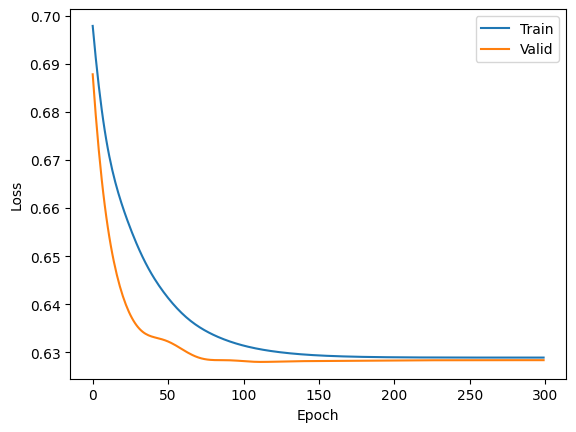

In [6]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_n_until_error_n'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [7]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.63
Standard Deviation of AUC: 0.01
Mean Accuracy: 0.67
Standard Deviation of Accuracy: 0.01


### LSTM

Train: torch.Size([3004, 30]), Test: torch.Size([567, 30]), Valid: torch.Size([307, 30])
Epoch [10/150], Loss: 0.6619, Loss Valid: 0.6588, Accuracy Valid: 0.6091
Epoch [20/150], Loss: 0.6481, Loss Valid: 0.6443, Accuracy Valid: 0.6482
Epoch [30/150], Loss: 0.6372, Loss Valid: 0.6470, Accuracy Valid: 0.6678
Epoch [40/150], Loss: 0.6348, Loss Valid: 0.6382, Accuracy Valid: 0.6678
Epoch [50/150], Loss: 0.6326, Loss Valid: 0.6315, Accuracy Valid: 0.6678
Epoch [60/150], Loss: 0.6349, Loss Valid: 0.6217, Accuracy Valid: 0.6678
Epoch [70/150], Loss: 0.6304, Loss Valid: 0.6344, Accuracy Valid: 0.6678
Epoch [80/150], Loss: 0.6296, Loss Valid: 0.6253, Accuracy Valid: 0.6678
Epoch [90/150], Loss: 0.6276, Loss Valid: 0.6233, Accuracy Valid: 0.6645
Epoch [100/150], Loss: 0.6254, Loss Valid: 0.6277, Accuracy Valid: 0.6743
Epoch [110/150], Loss: 0.6234, Loss Valid: 0.6340, Accuracy Valid: 0.6775
Epoch [120/150], Loss: 0.6200, Loss Valid: 0.6374, Accuracy Valid: 0.6775
Epoch [130/150], Loss: 0.6179, L

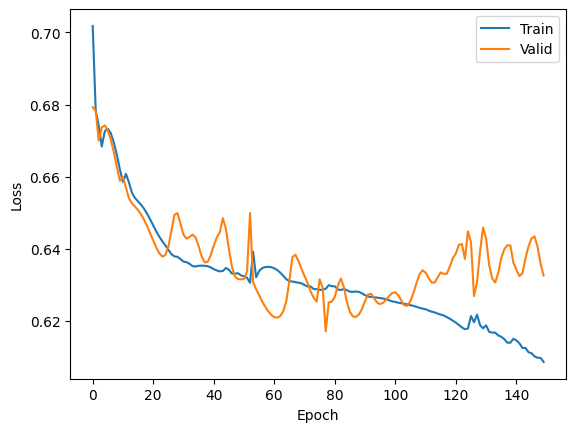

In [14]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.01,
    'weight_decay': 0,
    'dropout':0.2,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_n_until'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [15]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.64
Standard Deviation of AUC: 0.00
Mean Accuracy: 0.66
Standard Deviation of Accuracy: 0.01


## Experiment 12: nth data points of code and case 

#### Logistic Regression

Train: torch.Size([3004, 60]), Test: torch.Size([567, 60]), Valid: torch.Size([307, 60])
Epoch [10/300], Loss: 0.6713, Loss Valid: 0.6625, Accuracy Valid: 0.6091
Epoch [20/300], Loss: 0.6614, Loss Valid: 0.6545, Accuracy Valid: 0.6091
Epoch [30/300], Loss: 0.6541, Loss Valid: 0.6486, Accuracy Valid: 0.6059
Epoch [40/300], Loss: 0.6500, Loss Valid: 0.6359, Accuracy Valid: 0.6287
Epoch [50/300], Loss: 0.6464, Loss Valid: 0.6332, Accuracy Valid: 0.6319
Epoch [60/300], Loss: 0.6462, Loss Valid: 0.6298, Accuracy Valid: 0.6971
Epoch [70/300], Loss: 0.6449, Loss Valid: 0.6284, Accuracy Valid: 0.6873
Epoch [80/300], Loss: 0.6426, Loss Valid: 0.6273, Accuracy Valid: 0.6743
Epoch [90/300], Loss: 0.6438, Loss Valid: 0.6242, Accuracy Valid: 0.6775
Epoch [100/300], Loss: 0.6449, Loss Valid: 0.6273, Accuracy Valid: 0.6645
Epoch [110/300], Loss: 0.6454, Loss Valid: 0.6255, Accuracy Valid: 0.6906
Epoch [120/300], Loss: 0.6442, Loss Valid: 0.6234, Accuracy Valid: 0.6808
Epoch [130/300], Loss: 0.6455, L

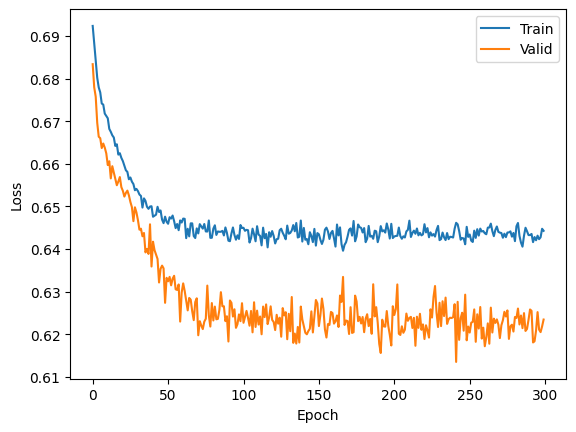

In [8]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0.1,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_case_n_until'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [9]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.63
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.65
Standard Deviation of Accuracy: 0.03


### LSTM

Train: torch.Size([3004, 60]), Test: torch.Size([567, 60]), Valid: torch.Size([307, 60])
Epoch [10/150], Loss: 0.6661, Loss Valid: 0.6646, Accuracy Valid: 0.6091
Epoch [20/150], Loss: 0.6526, Loss Valid: 0.6405, Accuracy Valid: 0.6059
Epoch [30/150], Loss: 0.6424, Loss Valid: 0.6211, Accuracy Valid: 0.6906
Epoch [40/150], Loss: 0.6352, Loss Valid: 0.6084, Accuracy Valid: 0.6417
Epoch [50/150], Loss: 0.6257, Loss Valid: 0.6030, Accuracy Valid: 0.6612
Epoch [60/150], Loss: 0.6250, Loss Valid: 0.6066, Accuracy Valid: 0.6678
Epoch [70/150], Loss: 0.6183, Loss Valid: 0.5983, Accuracy Valid: 0.6808
Epoch [80/150], Loss: 0.6132, Loss Valid: 0.6067, Accuracy Valid: 0.6612
Epoch [90/150], Loss: 0.6083, Loss Valid: 0.6009, Accuracy Valid: 0.6808
Epoch [100/150], Loss: 0.6147, Loss Valid: 0.5972, Accuracy Valid: 0.6873
Epoch [110/150], Loss: 0.6159, Loss Valid: 0.6137, Accuracy Valid: 0.6710
Epoch [120/150], Loss: 0.6013, Loss Valid: 0.6124, Accuracy Valid: 0.6678
Epoch [130/150], Loss: 0.5952, L

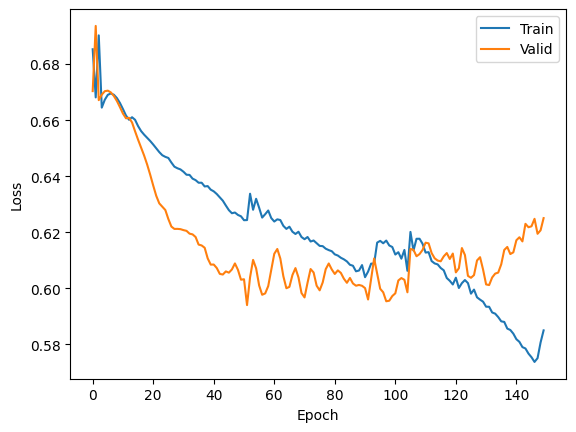

In [10]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.01,
    'weight_decay': 0,
    'dropout':0.2,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_case_n_until'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [11]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.64
Standard Deviation of AUC: 0.01
Mean Accuracy: 0.64
Standard Deviation of Accuracy: 0.01


## Experiment 13: nth data points of code and n datapoint of case

### Logistic Regression

Train: torch.Size([3004, 31]), Test: torch.Size([567, 31]), Valid: torch.Size([307, 31])
Epoch [10/300], Loss: 0.6718, Loss Valid: 0.6659, Accuracy Valid: 0.6091
Epoch [20/300], Loss: 0.6597, Loss Valid: 0.6504, Accuracy Valid: 0.6091
Epoch [30/300], Loss: 0.6513, Loss Valid: 0.6486, Accuracy Valid: 0.6059
Epoch [40/300], Loss: 0.6438, Loss Valid: 0.6424, Accuracy Valid: 0.6612
Epoch [50/300], Loss: 0.6397, Loss Valid: 0.6411, Accuracy Valid: 0.6678
Epoch [60/300], Loss: 0.6389, Loss Valid: 0.6304, Accuracy Valid: 0.6645
Epoch [70/300], Loss: 0.6326, Loss Valid: 0.6310, Accuracy Valid: 0.6840
Epoch [80/300], Loss: 0.6319, Loss Valid: 0.6248, Accuracy Valid: 0.6971
Epoch [90/300], Loss: 0.6323, Loss Valid: 0.6335, Accuracy Valid: 0.6645
Epoch [100/300], Loss: 0.6299, Loss Valid: 0.6284, Accuracy Valid: 0.6873
Epoch [110/300], Loss: 0.6294, Loss Valid: 0.6203, Accuracy Valid: 0.7101
Epoch [120/300], Loss: 0.6262, Loss Valid: 0.6104, Accuracy Valid: 0.7134
Epoch [130/300], Loss: 0.6283, L

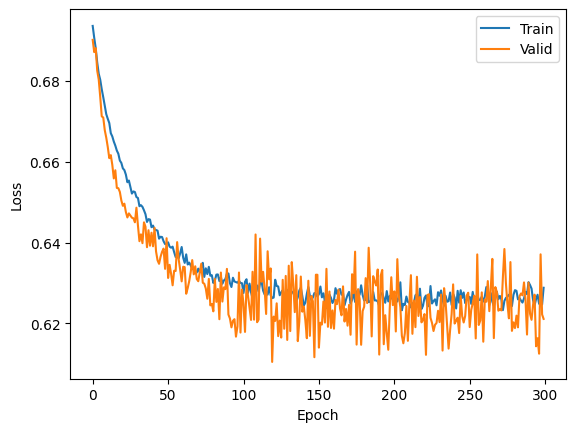

In [12]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0.1,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_case_n'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [13]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.66
Standard Deviation of AUC: 0.01
Mean Accuracy: 0.68
Standard Deviation of Accuracy: 0.02


### LSTM

Train: torch.Size([3004, 31]), Test: torch.Size([567, 31]), Valid: torch.Size([307, 31])
Epoch [10/150], Loss: 0.6547, Loss Valid: 0.6481, Accuracy Valid: 0.6091
Epoch [20/150], Loss: 0.6239, Loss Valid: 0.6169, Accuracy Valid: 0.6710
Epoch [30/150], Loss: 0.6179, Loss Valid: 0.6184, Accuracy Valid: 0.6775
Epoch [40/150], Loss: 0.6129, Loss Valid: 0.6191, Accuracy Valid: 0.6840
Epoch [50/150], Loss: 0.6133, Loss Valid: 0.6106, Accuracy Valid: 0.6938
Epoch [60/150], Loss: 0.6111, Loss Valid: 0.6288, Accuracy Valid: 0.6938
Epoch [70/150], Loss: 0.6080, Loss Valid: 0.6202, Accuracy Valid: 0.7003
Epoch [80/150], Loss: 0.6032, Loss Valid: 0.6113, Accuracy Valid: 0.6938
Epoch [90/150], Loss: 0.6013, Loss Valid: 0.6397, Accuracy Valid: 0.6906
Epoch [100/150], Loss: 0.5937, Loss Valid: 0.6387, Accuracy Valid: 0.6873
Epoch [110/150], Loss: 0.5911, Loss Valid: 0.6370, Accuracy Valid: 0.6808
Epoch [120/150], Loss: 0.5821, Loss Valid: 0.6494, Accuracy Valid: 0.6775
Epoch [130/150], Loss: 0.5797, L

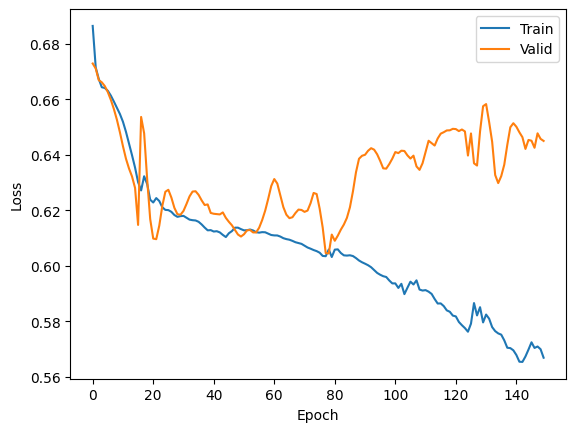

In [14]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.01,
    'weight_decay': 0,
    'dropout':0.2,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_case_n'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [15]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.64
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.67
Standard Deviation of Accuracy: 0.02


### Experiment 14: nth sequence of code and error, n-1th datapoint of world

### Logistic regression

Train: torch.Size([3004, 61]), Test: torch.Size([567, 61]), Valid: torch.Size([307, 61])
Epoch [10/300], Loss: 0.6723, Loss Valid: 0.6684, Accuracy Valid: 0.6091
Epoch [20/300], Loss: 0.6653, Loss Valid: 0.6562, Accuracy Valid: 0.6091
Epoch [30/300], Loss: 0.6583, Loss Valid: 0.6503, Accuracy Valid: 0.6091
Epoch [40/300], Loss: 0.6521, Loss Valid: 0.6442, Accuracy Valid: 0.6775
Epoch [50/300], Loss: 0.6510, Loss Valid: 0.6438, Accuracy Valid: 0.6645
Epoch [60/300], Loss: 0.6488, Loss Valid: 0.6383, Accuracy Valid: 0.6743
Epoch [70/300], Loss: 0.6455, Loss Valid: 0.6383, Accuracy Valid: 0.6710
Epoch [80/300], Loss: 0.6470, Loss Valid: 0.6431, Accuracy Valid: 0.6612
Epoch [90/300], Loss: 0.6479, Loss Valid: 0.6358, Accuracy Valid: 0.6678
Epoch [100/300], Loss: 0.6432, Loss Valid: 0.6332, Accuracy Valid: 0.6808
Epoch [110/300], Loss: 0.6473, Loss Valid: 0.6318, Accuracy Valid: 0.6808
Epoch [120/300], Loss: 0.6450, Loss Valid: 0.6335, Accuracy Valid: 0.6482
Epoch [130/300], Loss: 0.6439, L

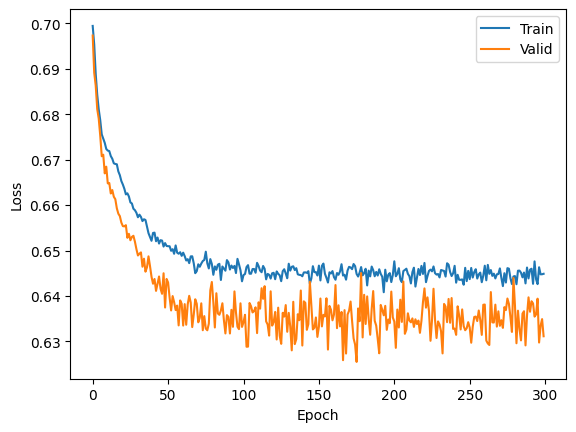

In [14]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0.1,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n_world_n_prev_only'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [15]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.62
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.65
Standard Deviation of Accuracy: 0.02


### LSTM

Train: torch.Size([3004, 61]), Test: torch.Size([567, 61]), Valid: torch.Size([307, 61])
Epoch [10/100], Loss: 0.6788, Loss Valid: 0.6764, Accuracy Valid: 0.6091
Epoch [20/100], Loss: 0.6666, Loss Valid: 0.6693, Accuracy Valid: 0.6091
Epoch [30/100], Loss: 0.6649, Loss Valid: 0.6688, Accuracy Valid: 0.6091
Epoch [40/100], Loss: 0.6631, Loss Valid: 0.6665, Accuracy Valid: 0.6091
Epoch [50/100], Loss: 0.6585, Loss Valid: 0.6610, Accuracy Valid: 0.6091
Epoch [60/100], Loss: 0.6487, Loss Valid: 0.6516, Accuracy Valid: 0.6059
Epoch [70/100], Loss: 0.6417, Loss Valid: 0.6439, Accuracy Valid: 0.6091
Epoch [80/100], Loss: 0.6327, Loss Valid: 0.6349, Accuracy Valid: 0.6580
Epoch [90/100], Loss: 0.6260, Loss Valid: 0.6264, Accuracy Valid: 0.6775
Epoch [100/100], Loss: 0.6213, Loss Valid: 0.6233, Accuracy Valid: 0.6775
Average Validation Accuracy: 0.6277
Accuracy: 67.20%
ROC AUC: 0.6581


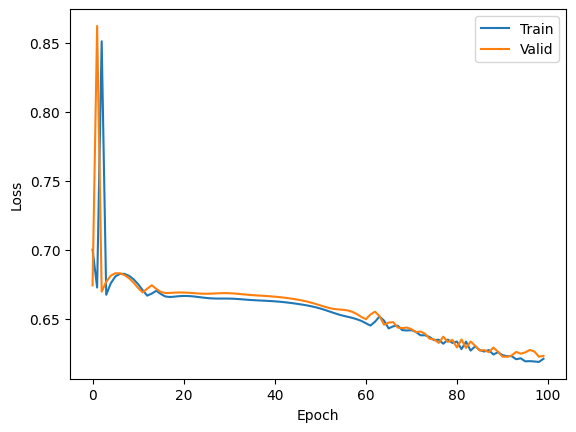

In [16]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 100,
    'lr': 0.01,
    'weight_decay': 0,
    'dropout':0.2,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_error_n_world_n_prev_only'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [18]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.66
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.66
Standard Deviation of Accuracy: 0.03


### Experiment 15: nth sequence of code, n-1th datapoint of world

#### Logistic regression

Train: torch.Size([3004, 31]), Test: torch.Size([567, 31]), Valid: torch.Size([307, 31])
Epoch [10/300], Loss: 0.6875, Loss Valid: 0.6758, Accuracy Valid: 0.6026
Epoch [20/300], Loss: 0.6746, Loss Valid: 0.6598, Accuracy Valid: 0.6091
Epoch [30/300], Loss: 0.6650, Loss Valid: 0.6516, Accuracy Valid: 0.6091
Epoch [40/300], Loss: 0.6578, Loss Valid: 0.6466, Accuracy Valid: 0.6612
Epoch [50/300], Loss: 0.6522, Loss Valid: 0.6420, Accuracy Valid: 0.6710
Epoch [60/300], Loss: 0.6478, Loss Valid: 0.6390, Accuracy Valid: 0.6808
Epoch [70/300], Loss: 0.6443, Loss Valid: 0.6375, Accuracy Valid: 0.6840
Epoch [80/300], Loss: 0.6414, Loss Valid: 0.6365, Accuracy Valid: 0.6775
Epoch [90/300], Loss: 0.6391, Loss Valid: 0.6356, Accuracy Valid: 0.6743
Epoch [100/300], Loss: 0.6372, Loss Valid: 0.6351, Accuracy Valid: 0.6645
Epoch [110/300], Loss: 0.6357, Loss Valid: 0.6349, Accuracy Valid: 0.6645
Epoch [120/300], Loss: 0.6345, Loss Valid: 0.6347, Accuracy Valid: 0.6612
Epoch [130/300], Loss: 0.6336, L

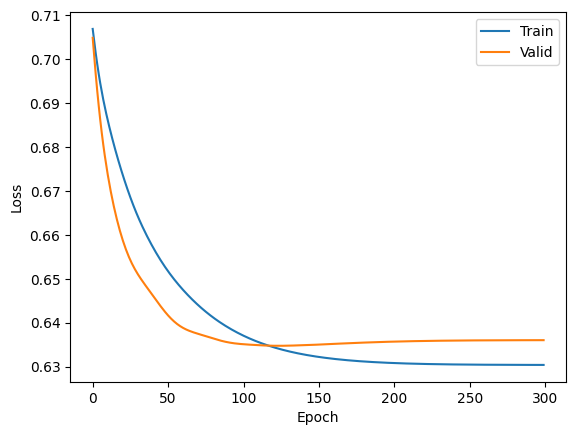

In [8]:
# Set up the arguments for the training
args = {
    'model_type': 'logistic',
    'data': df,
    'epochs': 300,
    'lr': 0.01,
    'weight_decay': 0.01,
    'dropout':0,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_n_world_n_prev_only'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [9]:
cross_validate(**args, k=5)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Mean AUC: 0.64
Standard Deviation of AUC: 0.02
Mean Accuracy: 0.67
Standard Deviation of Accuracy: 0.01


#### LSTM

Train: torch.Size([3004, 31]), Test: torch.Size([567, 31]), Valid: torch.Size([307, 31])
Epoch [10/150], Loss: 0.6570, Loss Valid: 0.6565, Accuracy Valid: 0.6091
Epoch [20/150], Loss: 0.6645, Loss Valid: 0.6803, Accuracy Valid: 0.5440
Epoch [30/150], Loss: 0.6471, Loss Valid: 0.6507, Accuracy Valid: 0.6450
Epoch [40/150], Loss: 0.6372, Loss Valid: 0.6453, Accuracy Valid: 0.6580
Epoch [50/150], Loss: 0.6305, Loss Valid: 0.6445, Accuracy Valid: 0.6678
Epoch [60/150], Loss: 0.6257, Loss Valid: 0.6352, Accuracy Valid: 0.6678
Epoch [70/150], Loss: 0.6234, Loss Valid: 0.6352, Accuracy Valid: 0.6580
Epoch [80/150], Loss: 0.6281, Loss Valid: 0.6287, Accuracy Valid: 0.6678
Epoch [90/150], Loss: 0.6249, Loss Valid: 0.6368, Accuracy Valid: 0.6580
Epoch [100/150], Loss: 0.6226, Loss Valid: 0.6385, Accuracy Valid: 0.6580
Epoch [110/150], Loss: 0.6204, Loss Valid: 0.6322, Accuracy Valid: 0.6580
Epoch [120/150], Loss: 0.6178, Loss Valid: 0.6270, Accuracy Valid: 0.6743
Epoch [130/150], Loss: 0.6154, L

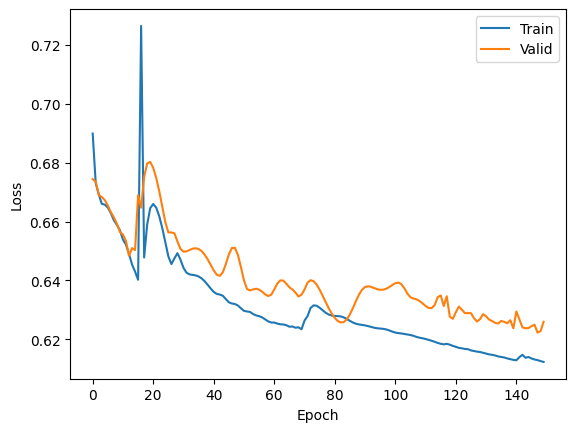

In [10]:
# Set up the arguments for the training
args = {
    'model_type': 'lstm',
    'data': df,
    'epochs': 150,
    'lr': 0.01,
    'weight_decay': 0,
    'dropout':0.2,
    'hidden_dim': 100,
    'split_type': "distribution",
    'task': 'code_n_world_n_prev_only'
}

train_losses, valid_losses, roc_auc, fpr, tpr = train(**args)
plot_loss_roc(train_losses, valid_losses, roc_auc, fpr, tpr)

In [ ]:
cross_validate(**args, k=5)